<h3> Toy Car Sales Data Project: Part 2

In [33]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec #For changing the size of individual charts in a subplot
from pandas import ExcelWriter
import openpyxl
import TCS_pipeline as tcs

In [2]:
usa_data = tcs.TCSpipelineCountry(country='USA',generate_excel=False)

Creating a dictionary of key:value pairs where the key is the dataframe name and the value is its index position in the list.

In [3]:

df_name_index = {'country_orders_by_month':0,
'country_orders_by_quarter':1,
'country_monthly_total_sales':2,
'country_quarterly_total_sales':3,
'country_average_sale_per_order_monthly':4,
'country_average_sale_per_order_quarterly':5,
'country_orders_per_product':6}

In [4]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
quarters = ['Q1','Q2','Q3','Q4']

In [5]:
df_name_index['country_orders_by_month']

0

In [6]:
usa_orders_monthly = usa_data[df_name_index['country_orders_by_month']]
usa_orders_monthly.columns = ['Orders']
usa_orders_monthly['Month'] = months
usa_orders_monthly

,Orders,Month
1,69,Jan
2,66,Feb
3,71,Mar
4,53,Apr
5,85,May
6,48,Jun
7,56,Jul
8,112,Aug
9,44,Sep
10,119,Oct


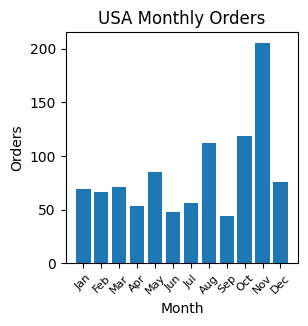

In [7]:
plt.figure(figsize=(3,3))
plt.bar(usa_orders_monthly['Month'], usa_orders_monthly['Orders'])
plt.xlabel('Month')
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('Orders')
plt.title('USA Monthly Orders')
plt.show()

Now doing this for all the data in a set of subplots.
Example of how you would do this for a random set of data (for reference from ChatGPT 4o):

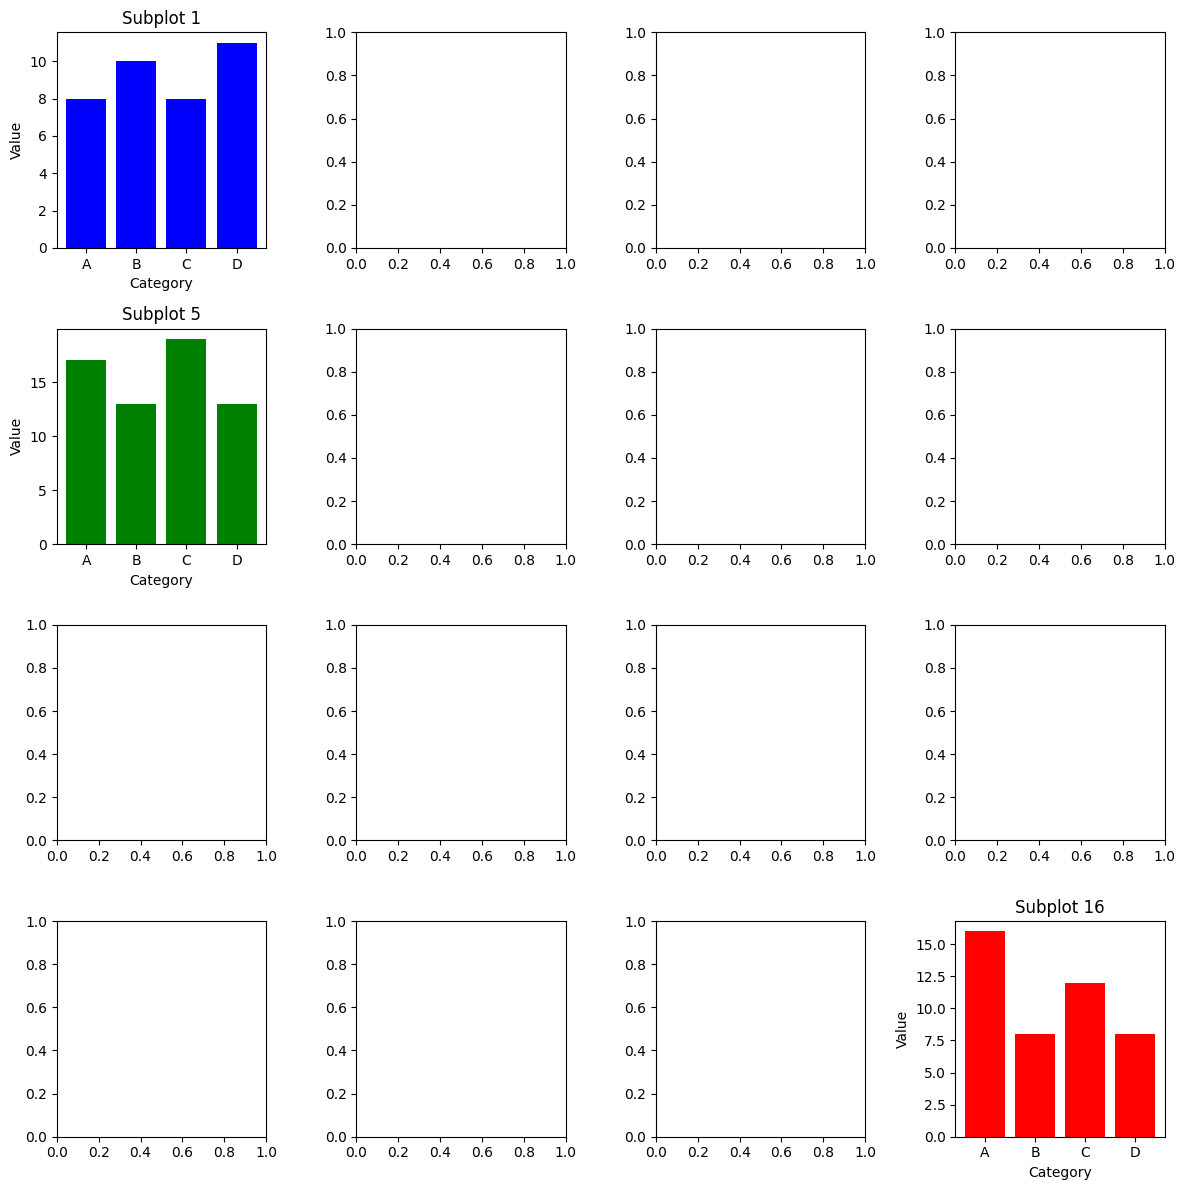

In [8]:
# Generate sample data for each subplot
data_list = []
for i in range(16):
    data = {
        'Category': ['A', 'B', 'C', 'D'],
        'Value': np.random.randint(1, 20, 4)
    }
    df = pd.DataFrame(data)
    data_list.append(df)

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Plot different data in specific subplots using indexing
# Example: Plotting data in the first, fifth, and last subplot

# Plot in the first subplot (top-left corner)
ax = axs[0, 0]
df = data_list[0]
ax.bar(df['Category'], df['Value'], color='blue')
ax.set_title('Subplot 1')
ax.set_xlabel('Category')
ax.set_ylabel('Value')

# Plot in the fifth subplot (second row, first column)
ax = axs[1, 0]
df = data_list[4]
ax.bar(df['Category'], df['Value'], color='green')
ax.set_title('Subplot 5')
ax.set_xlabel('Category')
ax.set_ylabel('Value')

# Plot in the last subplot (bottom-right corner)
ax = axs[3, 3]
df = data_list[15]
ax.bar(df['Category'], df['Value'], color='red')
ax.set_title('Subplot 16')
ax.set_xlabel('Category')
ax.set_ylabel('Value')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Now trying for our data.

In [35]:
data = tcs.TCSpipelineCountry(country='USA',generate_excel=False) #New set of data

In [36]:
#The list of dataframes and their respective indices in the 'data' list
df_names = {'country_orders_by_month':0,
'country_orders_by_quarter':1,
'country_monthly_total_sales':2,
'country_quarterly_total_sales':3,
'country_average_sale_per_order_monthly':4,
'country_average_sale_per_order_quarterly':5,
'country_orders_per_product':6}

In [37]:
#Assess the data here:

data[df_names['country_orders_per_product']]

,0
Vintage Cars,224
Motorcycles,149
Classic Cars,329
Trucks and Buses,112
Trains,25
Ships,70
Planes,95


Text(0, 0.5, 'Orders')

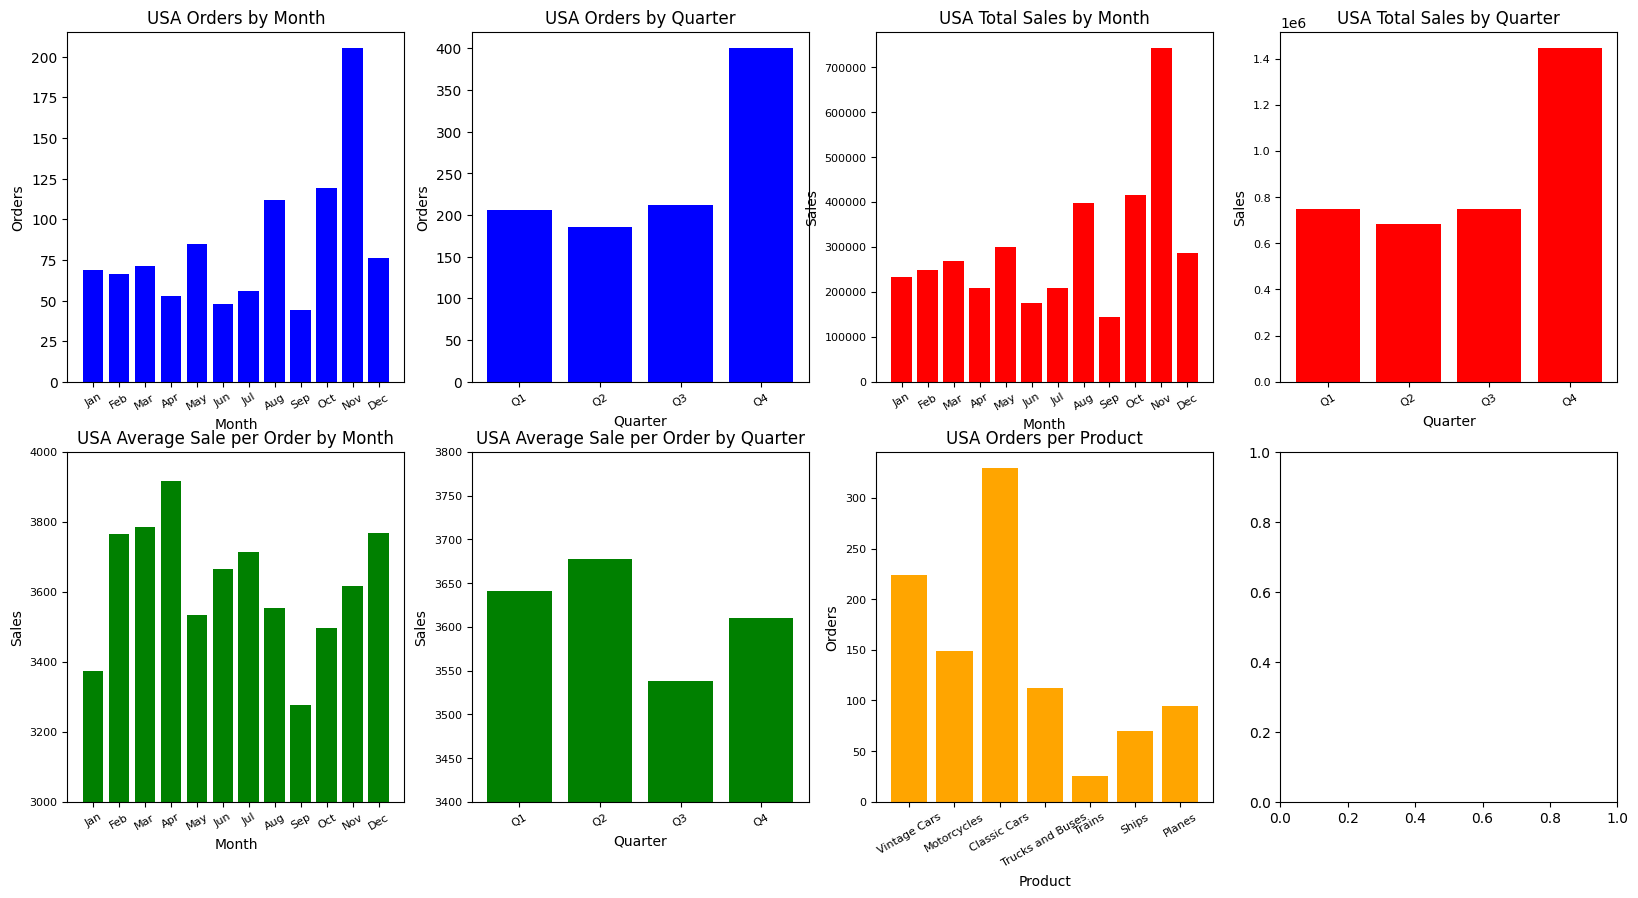

In [40]:
fig, axs = plt.subplots(2,4, figsize=(20,10))

# 1: Country Orders By Month
ax = axs[0, 0]
df = data[df_names['country_orders_by_month']]
ax.bar(months, df[0], color='blue')
ax.set_title('USA Orders by Month')
ax.set_xlabel('Month')
ax.tick_params(axis='x', labelsize=8, rotation=30)
ax.set_ylabel('Orders')

#2: Country Orders By Quarter
ax = axs[0, 1]
df = data[df_names['country_orders_by_quarter']]
ax.bar(quarters, df[0], color='blue')
ax.set_title('USA Orders by Quarter')
ax.set_xlabel('Quarter')
ax.tick_params(axis='x', labelsize=8, rotation=30)
ax.set_ylabel('Orders')

#3: Country Total Sales by Month
ax = axs[0, 2]
df = data[df_names['country_monthly_total_sales']]
ax.bar(months, df[0], color='red')
ax.set_title('USA Total Sales by Month')
ax.set_xlabel('Month')
ax.tick_params(axis='x', labelsize=8, rotation=30)
ax.tick_params(axis='y',labelsize=8)
ax.set_ylabel('Sales')

#4: Country Total Sales by Quarter
ax = axs[0, 3]
df = data[df_names['country_quarterly_total_sales']]
ax.bar(quarters, df[0], color='red')
ax.set_title('USA Total Sales by Quarter')
ax.set_xlabel('Quarter')
ax.tick_params(axis='x', labelsize=8, rotation=30)
ax.tick_params(axis='y',labelsize=8)
ax.set_ylabel('Sales')

#5: Country Average Sale per Order by Month
ax = axs[1, 0]
df = data[df_names['country_average_sale_per_order_monthly']]
ax.bar(months, df[0], color='green')
ax.set_title('USA Average Sale per Order by Month')
ax.set_xlabel('Month')
ax.tick_params(axis='x', labelsize=8, rotation=30)
ax.tick_params(axis='y',labelsize=8)
ax.set_ylabel('Sales')
ax.set_ylim(3000,4000)

#6: Country Average Sale per Order by Quarterly
ax = axs[1, 1]
df = data[df_names['country_average_sale_per_order_quarterly']]
ax.bar(quarters, df[0], color='green')
ax.set_title('USA Average Sale per Order by Quarter')
ax.set_xlabel('Quarter')
ax.tick_params(axis='x', labelsize=8, rotation=30)
ax.tick_params(axis='y',labelsize=8)
ax.set_ylabel('Sales')
ax.set_ylim(3400,3800)

#7: Country Orders per Product
ax = axs[1, 2]
df = data[df_names['country_orders_per_product']]
ax.bar(df.index, df[0], color='orange')
ax.set_title('USA Orders per Product')
ax.set_xlabel('Product')
ax.tick_params(axis='x', labelsize=8, rotation=30)
ax.tick_params(axis='y',labelsize=8)
ax.set_ylabel('Orders')





Now creating a function that can do this for any of the countries.

Something to think about for the future: is there a way that this function could be used with any set of data i.e. not just this TCS data? Would help having a pre-written function for future projects.

In [13]:
image_path = 'C:/Users/cochr/OneDrive/Libertas Data/Projects/Example Projects/Toy Car Sales Project/Chart Images/USA_charts.png'

In [14]:
def plot_data(data,country_name:str,save_image:bool,image_path:str):
    """
    data (list): The list of dataframes generated by the 'TCSpipelineCountry' function.

    country (str): The name of the country to be plotted.

    image_path (str): The desired path name of the image of the charts plotted to be saved as.
    """
    df_names = {'country_orders_by_month':0,
    'country_orders_by_quarter':1,
    'country_monthly_total_sales':2,
    'country_quarterly_total_sales':3,
    'country_average_sale_per_order_monthly':4,
    'country_average_sale_per_order_quarterly':5,
    'country_orders_per_product':6}

    months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    quarters = ['Q1','Q2','Q3','Q4']

    fig, axs = plt.subplots(2,4, figsize=(20,10))

    # 1: Country Orders By Month
    ax = axs[0, 0]
    df = data[df_names['country_orders_by_month']]
    ax.bar(months, df[0], color='blue')
    ax.set_title(f'{country_name} Orders by Month')
    ax.set_xlabel('Month')
    ax.tick_params(axis='x', labelsize=8, rotation=30)
    ax.set_ylabel('Orders')

    #2: Country Orders By Quarter
    ax = axs[0, 1]
    df = data[df_names['country_orders_by_quarter']]
    ax.bar(quarters, df[0], color='blue')
    ax.set_title(f'{country_name} Orders by Quarter')
    ax.set_xlabel('Quarter')
    ax.tick_params(axis='x', labelsize=8, rotation=30)
    ax.set_ylabel('Orders')

    #3: Country Total Sales by Month
    ax = axs[0, 2]
    df = data[df_names['country_monthly_total_sales']]
    ax.bar(months, df[0], color='red')
    ax.set_title(f'{country_name} Total Sales by Month')
    ax.set_xlabel('Month')
    ax.tick_params(axis='x', labelsize=8, rotation=30)
    ax.tick_params(axis='y',labelsize=8)
    ax.set_ylabel('Sales')

    #4: Country Total Sales by Quarter
    ax = axs[0, 3]
    df = data[df_names['country_quarterly_total_sales']]
    ax.bar(quarters, df[0], color='red')
    ax.set_title(f'{country_name} Total Sales by Quarter')
    ax.set_xlabel('Quarter')
    ax.tick_params(axis='x', labelsize=8, rotation=30)
    ax.tick_params(axis='y',labelsize=8)
    ax.set_ylabel('Sales')

    #5: Country Average Sale per Order by Month
    ax = axs[1, 0]
    df = data[df_names['country_average_sale_per_order_monthly']]
    ax.bar(months, df[0], color='green')
    ax.set_title(f'{country_name} Average Sale per Order by Month')
    ax.set_xlabel('Month')
    ax.tick_params(axis='x', labelsize=8, rotation=30)
    ax.tick_params(axis='y',labelsize=8)
    ax.set_ylabel('Sales')
    #ax.set_ylim(3000,4000)

    #6: Country Average Sale per Order by Quarterly
    ax = axs[1, 1]
    df = data[df_names['country_average_sale_per_order_quarterly']]
    ax.bar(quarters, df[0], color='green')
    ax.set_title(f'{country_name} Average Sale per Order by Quarter')
    ax.set_xlabel('Quarter')
    ax.tick_params(axis='x', labelsize=8, rotation=30)
    ax.tick_params(axis='y',labelsize=8)
    ax.set_ylabel('Sales')
    #ax.set_ylim(3400,3800)

    #7: Country Orders per Product
    ax = axs[1, 2]
    df = data[df_names['country_orders_per_product']]
    ax.bar(df.index, df[0], color='orange')
    ax.set_title(f'{country_name} Orders per Product')
    ax.set_xlabel('Product')
    ax.tick_params(axis='x', labelsize=8, rotation=30)
    ax.tick_params(axis='y',labelsize=8)
    ax.set_ylabel('Orders')

    if save_image == True:
        plt.savefig(image_path,format='png', dpi=300)
    
    plt.show()
     

In [15]:
data = tcs.TCSpipelineCountry(country='USA')

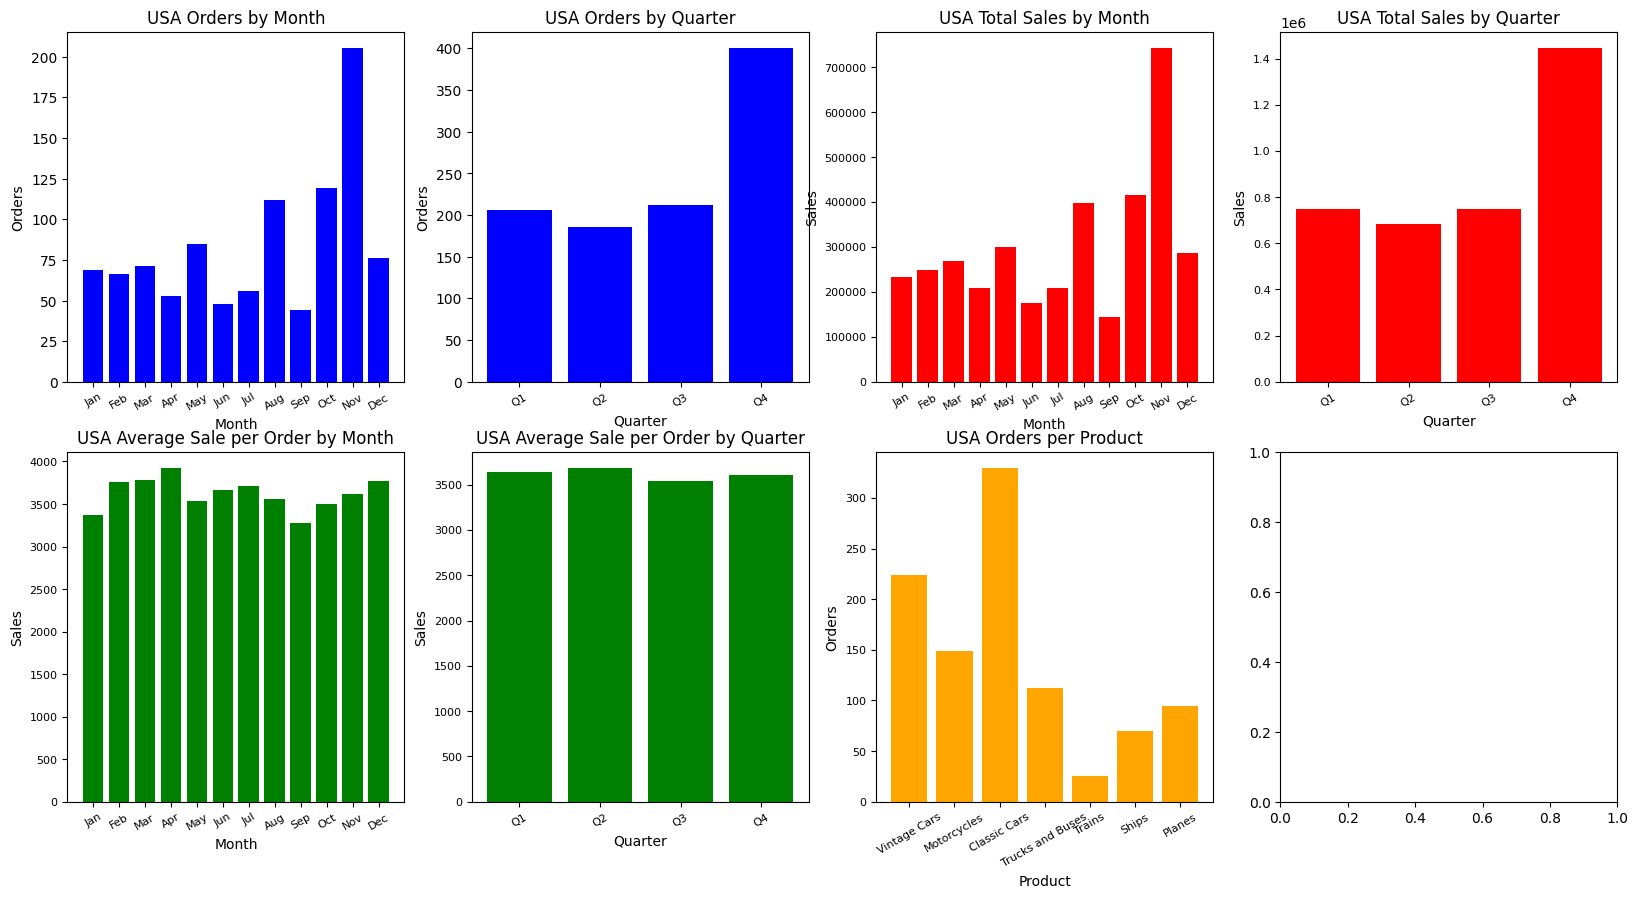

In [16]:
plot_data(data=data,country_name='USA',save_image=True,image_path=image_path)

Testing for the other countries:

In [17]:
uk_data = tcs.TCSpipelineCountry(country = 'UK')

In [18]:
uk_data[2]

,0
3,77924.60
6,82784.54
11,170526.57
1,8477.22
10,84624.82
12,13739.90
4,40802.81


Some of the months and quarters are missing. We need to add these months so the plotting works ok

In [19]:
# Sorting the rows first from lowest to highest.

uk_data[2].sort_index()

,0
1,8477.22
3,77924.60
4,40802.81
6,82784.54
10,84624.82
11,170526.57
12,13739.90


In [20]:
# Adding the missing months:

all_months = list(range(1,13))

missing_months = [month for month in all_months if month not in uk_data[2].index]

missing_df = pd.DataFrame(0,index=missing_months,columns=[0])

uk_data[2] = uk_data[2]._append(missing_df).sort_index()
 

In [21]:
uk_data[2]

,0
1,8477.22
2,0.00
3,77924.60
4,40802.81
5,0.00
6,82784.54
7,0.00
8,0.00
9,0.00
10,84624.82


In [22]:
def add_missing_months(dataframe):

    dataframe.sort_index()
    all_months = list(range(1,13))
    missing_months = [month for month in all_months if month not in dataframe.index]
    missing_df = pd.DataFrame(0,index=missing_months,columns=[0])
    new_dataframe = dataframe._append(missing_df).sort_index()

    return new_dataframe
    

In [23]:
def add_missing_quarters(dataframe):

    dataframe.sort_index()
    all_quarters = list(range(1,5))
    missing_quarters = [quarter for quarter in all_quarters if quarter not in dataframe.index]
    missing_df = pd.DataFrame(0,index=missing_quarters,columns=[0])
    new_dataframe = dataframe._append(missing_df).sort_index()

    return new_dataframe


In [24]:
def add_missing_products(dataframe):
    
    all_products = ['Vintage Cars','Motorcycles','Classic Cars','Trucks and Buses','Trains','Ships','Planes']
    missing_products = [product for product in all_products if product not in dataframe.index]
    missing_df = pd.DataFrame(0,index=missing_products,columns=[0])
    new_dataframe = dataframe._append(missing_df)

    return new_dataframe

In [25]:
df_name_index = {'country_orders_by_month':0,
'country_orders_by_quarter':1,
'country_monthly_total_sales':2,
'country_quarterly_total_sales':3,
'country_average_sale_per_order_monthly':4,
'country_average_sale_per_order_quarterly':5,
'country_orders_per_product':6}

In [26]:
def fill_m_q(df_list):
    df_name_index = {'country_orders_by_month':0,
    'country_orders_by_quarter':1,
    'country_monthly_total_sales':2,
    'country_quarterly_total_sales':3,
    'country_average_sale_per_order_monthly':4,
    'country_average_sale_per_order_quarterly':5,
    'country_orders_per_product':6}

    df_list[df_name_index['country_orders_by_month']] = add_missing_months(df_list[df_name_index['country_orders_by_month']])
    df_list[df_name_index['country_orders_by_quarter']] = add_missing_quarters(df_list[df_name_index['country_orders_by_quarter']])
    df_list[df_name_index['country_monthly_total_sales']] = add_missing_months(df_list[df_name_index['country_monthly_total_sales']])
    df_list[df_name_index['country_quarterly_total_sales']] = add_missing_quarters(df_list[df_name_index['country_quarterly_total_sales']])
    df_list[df_name_index['country_average_sale_per_order_monthly']] = add_missing_months(df_list[df_name_index['country_average_sale_per_order_monthly']])
    df_list[df_name_index['country_average_sale_per_order_quarterly']] = add_missing_quarters(df_list[df_name_index['country_average_sale_per_order_quarterly']])
    df_list[df_name_index['country_orders_per_product']] = add_missing_products(df_list[df_name_index['country_orders_per_product']])
 

In [27]:
uk_data = tcs.TCSpipelineCountry(country = 'UK')

In [28]:
fill_m_q(uk_data)

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


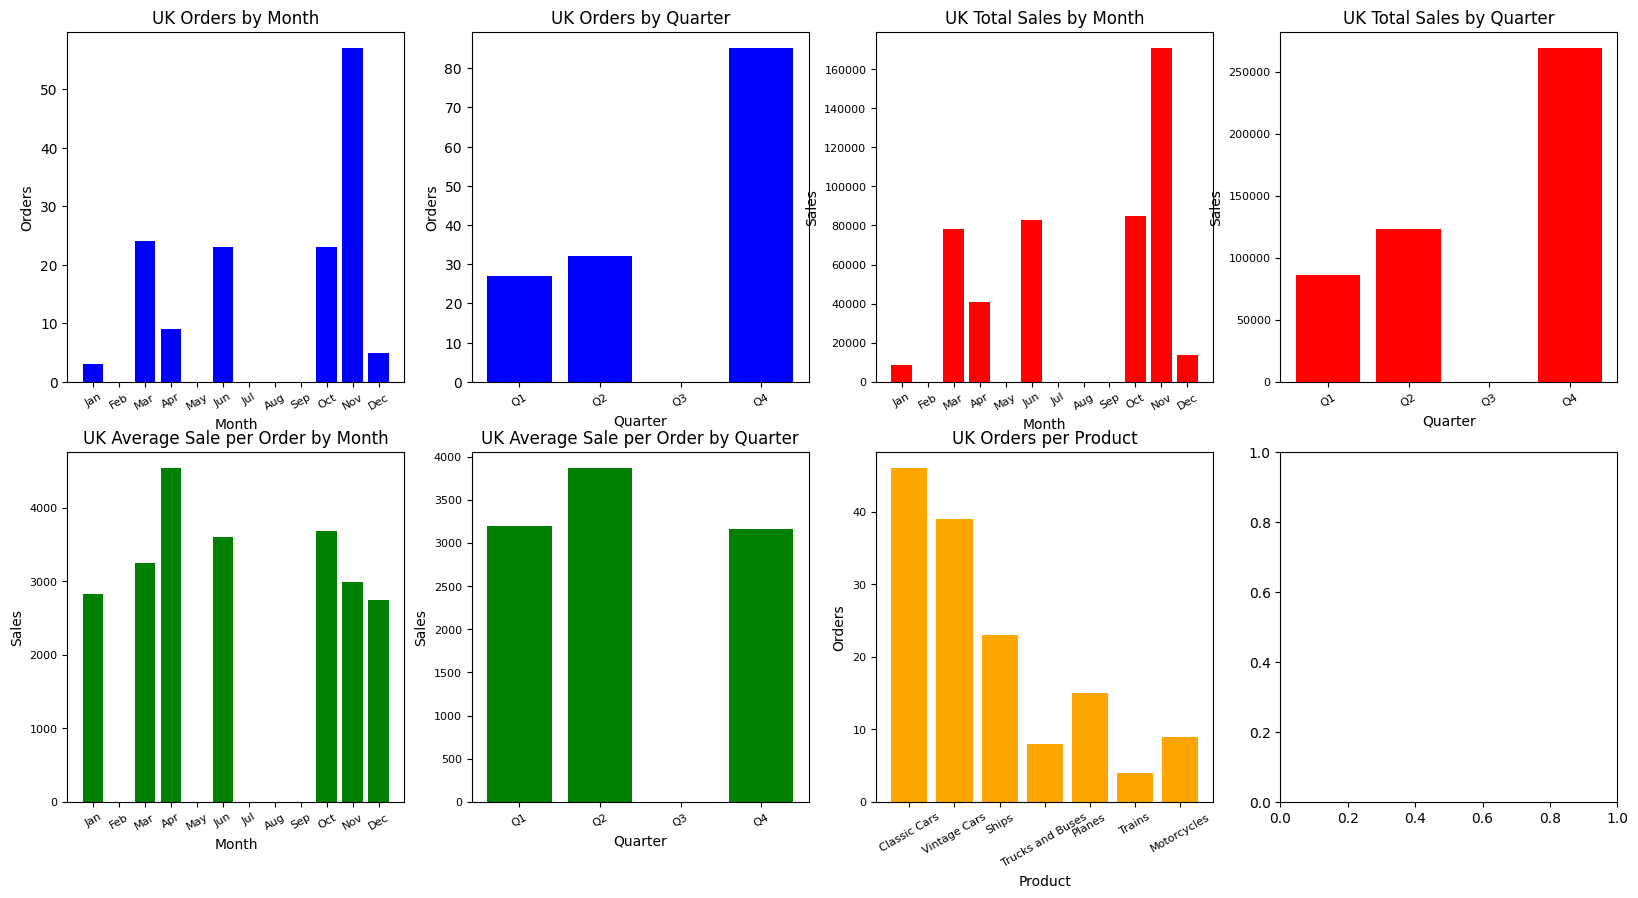

In [29]:
image_path = 'C:/Users/cochr/OneDrive/Libertas Data/Projects/Example Projects/Toy Car Sales Project/Chart Images/UK_charts_1.png'

plot_data(data=uk_data,country_name='UK',save_image=True,image_path=image_path)

Testing another country:

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


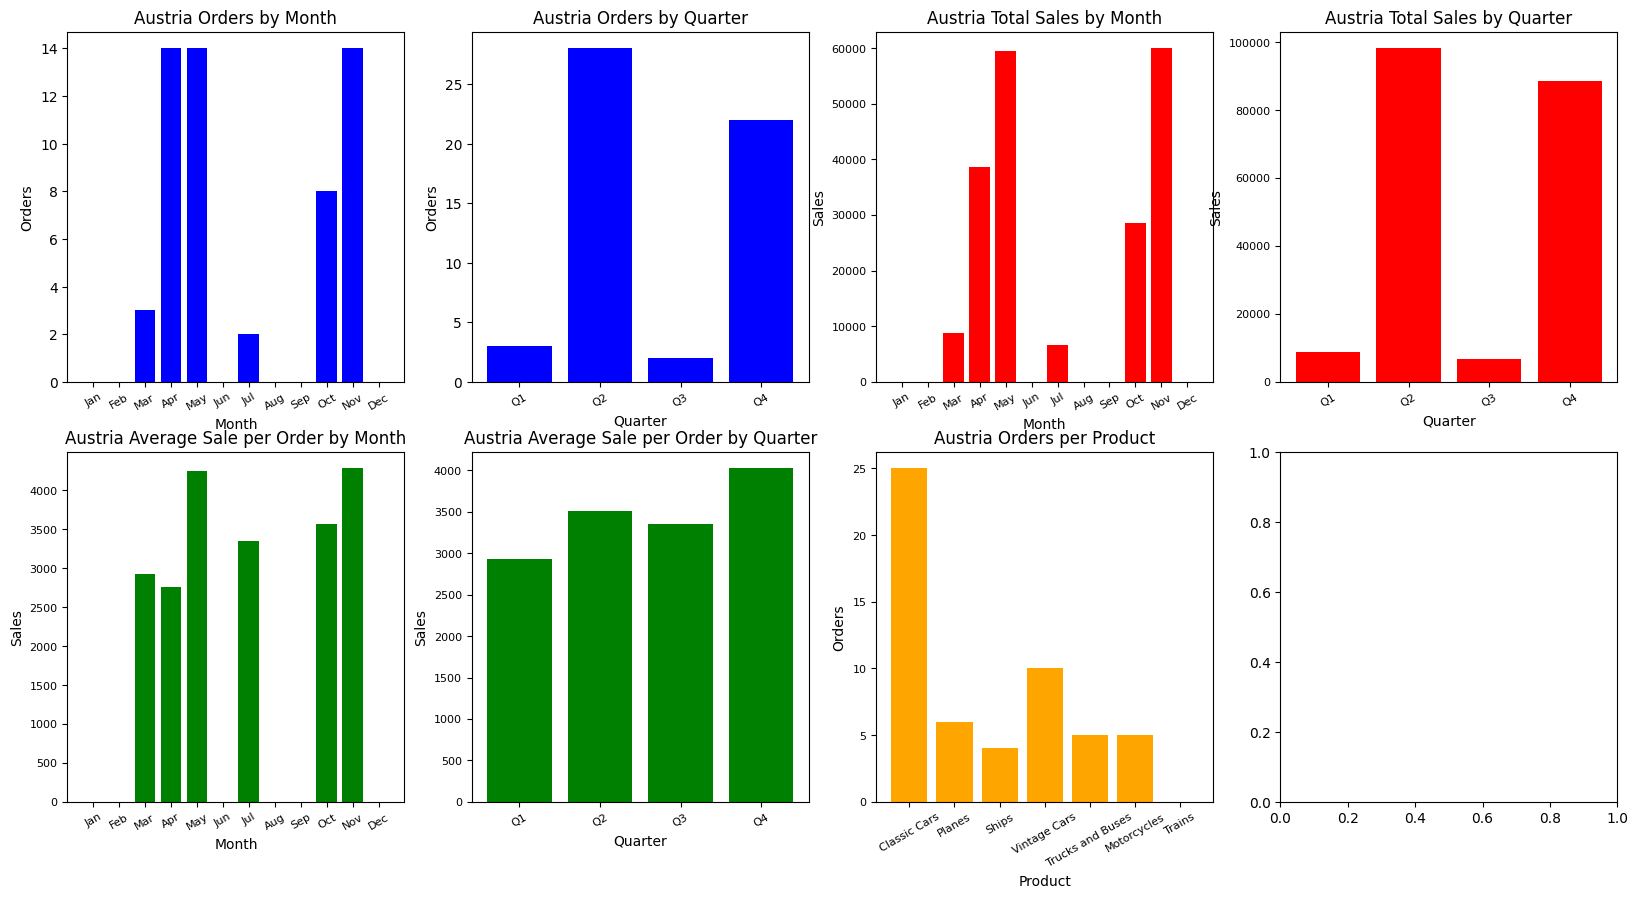

In [30]:
#Austria

austria_data = tcs.TCSpipelineCountry(country = 'Austria')
fill_m_q(austria_data)
image_path = 'C:/Users/cochr/OneDrive/Libertas Data/Projects/Example Projects/Toy Car Sales Project/Chart Images/Austria_charts_1.png'
plot_data(data=austria_data,country_name='Austria',save_image=True,image_path=image_path)

Can we do this for an entire list of countries in a loop?

In [31]:
countries = ['USA', 'Germany', 'Norway', 'Spain', 'Denmark', 'Italy','Philippines', 'UK', 'Sweden', 'France', 'Belgium', 'Singapore','Austria', 'Australia', 'Finland', 'Canada', 'Japan', 'Ireland','Switzerland']

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


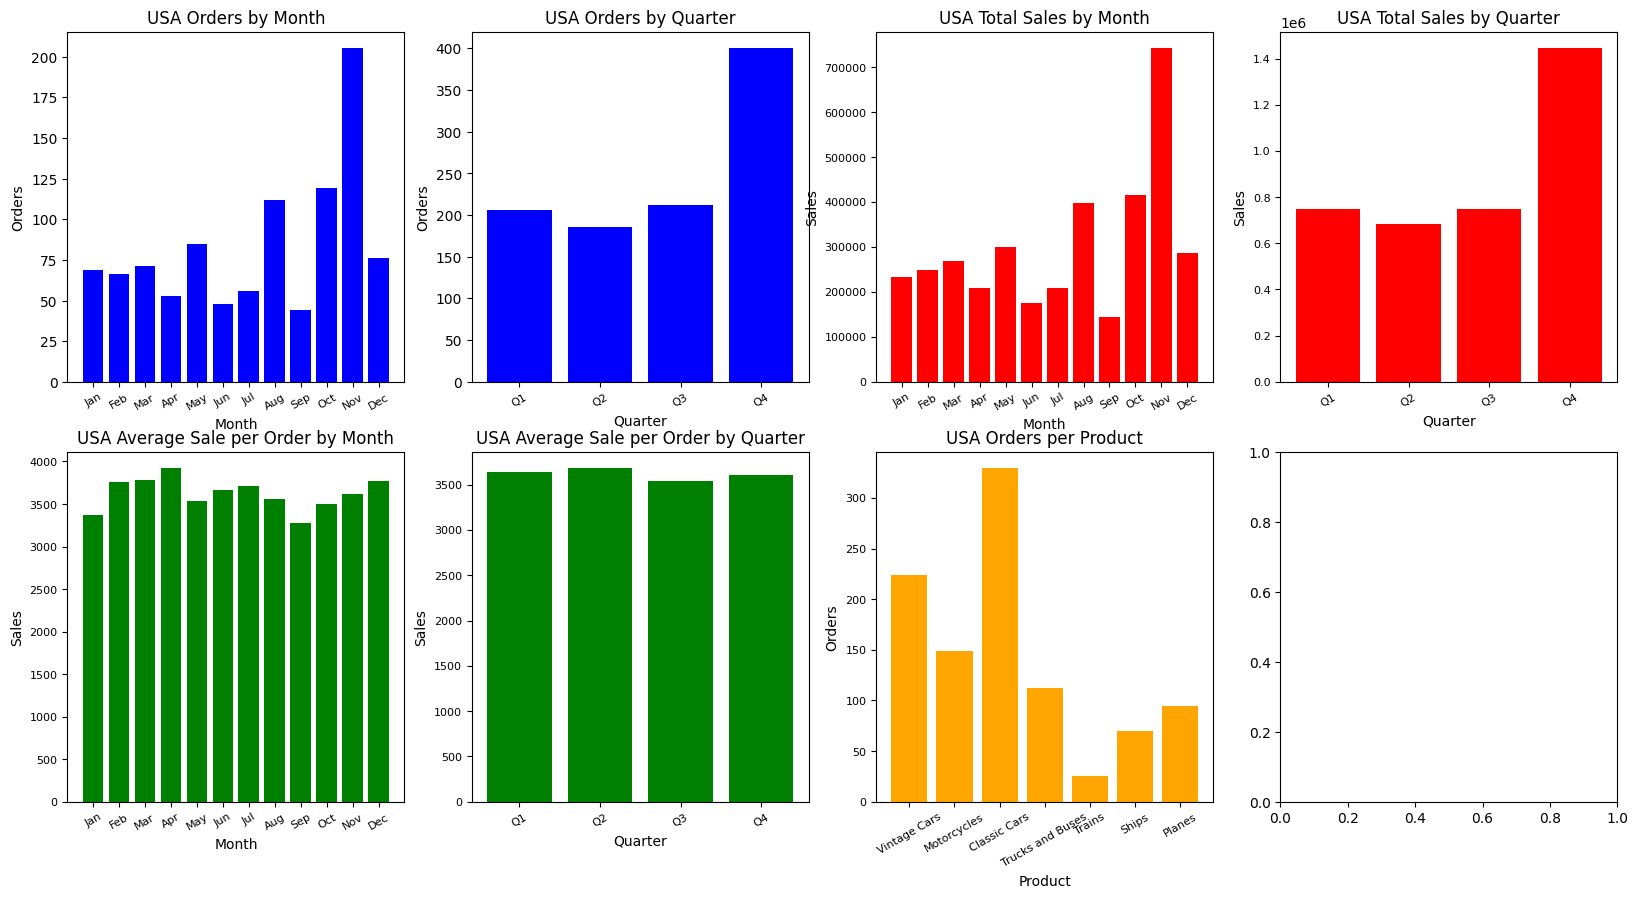

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


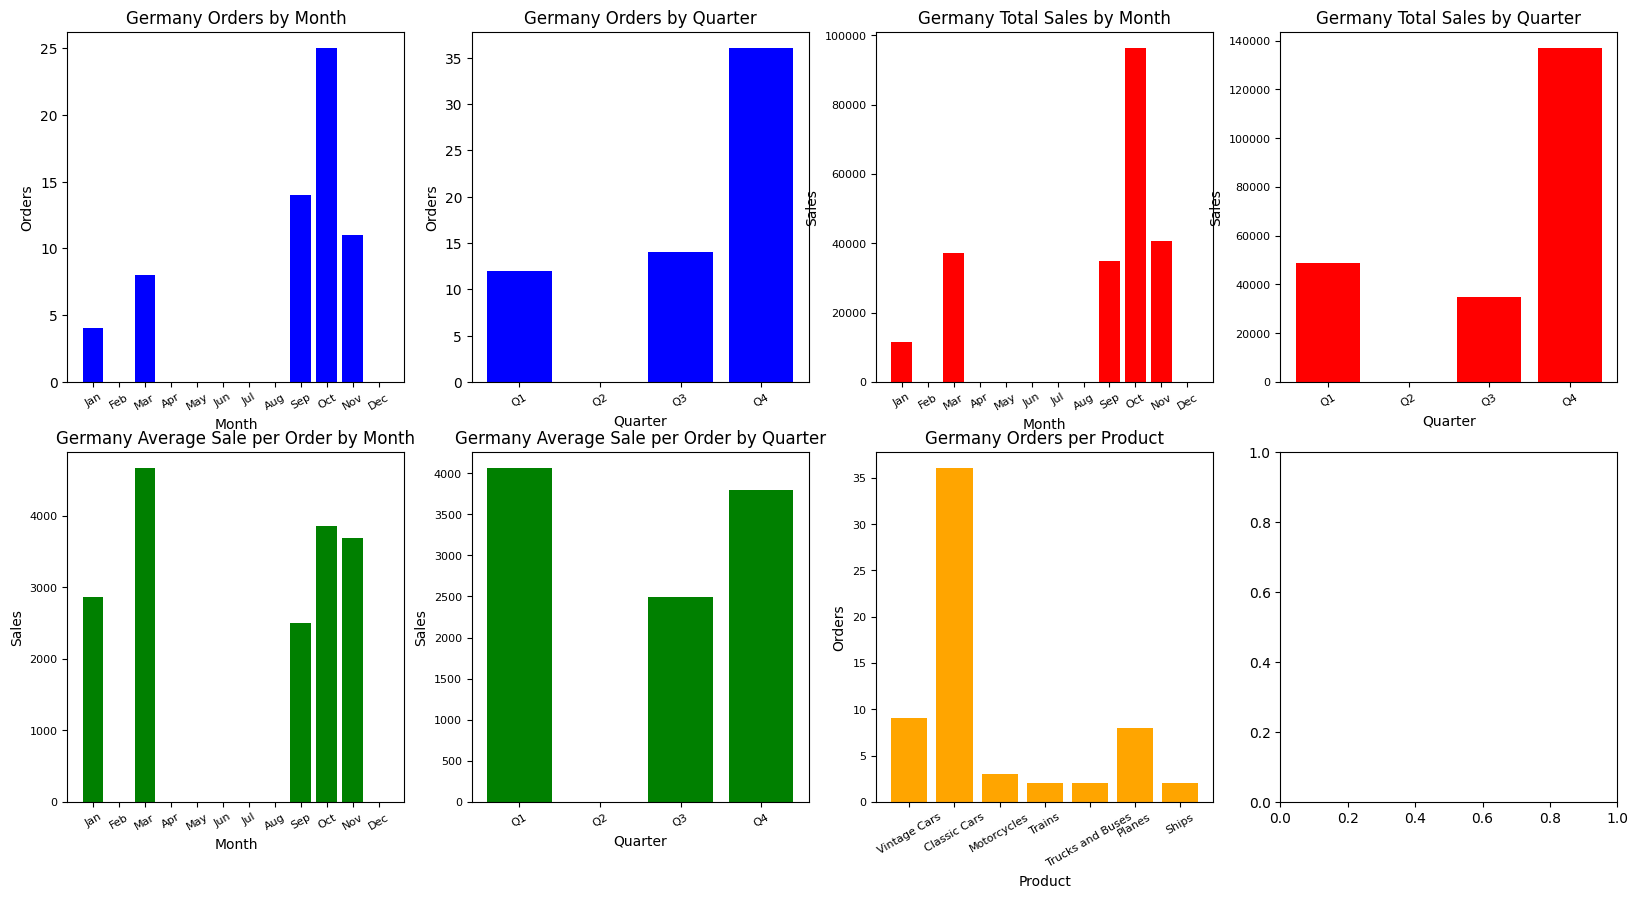

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


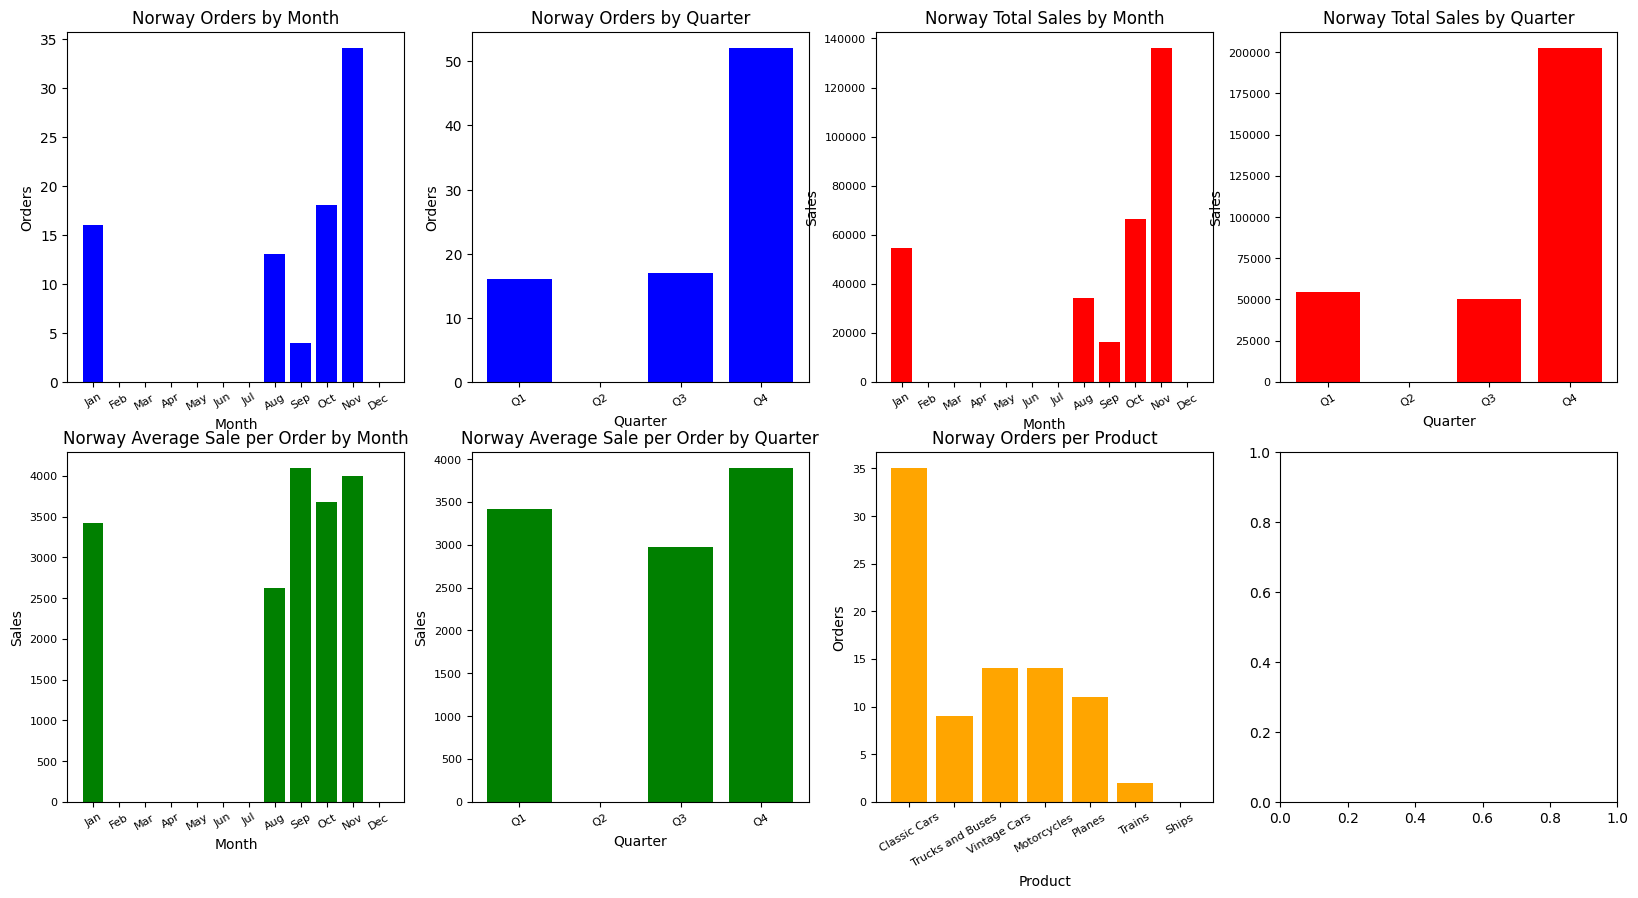

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


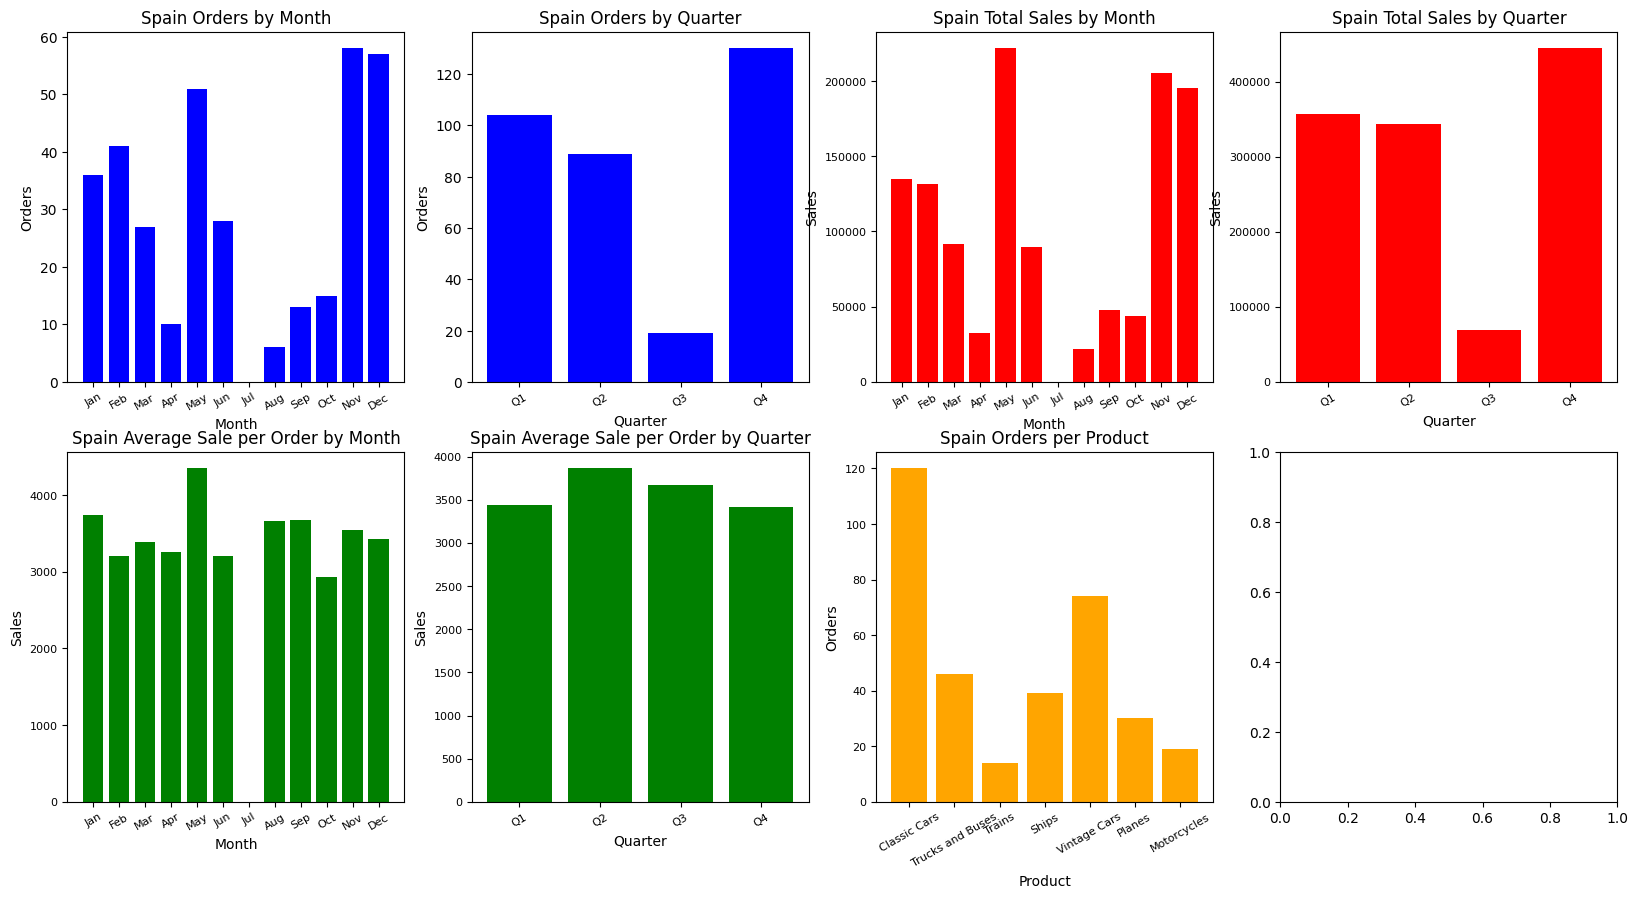

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


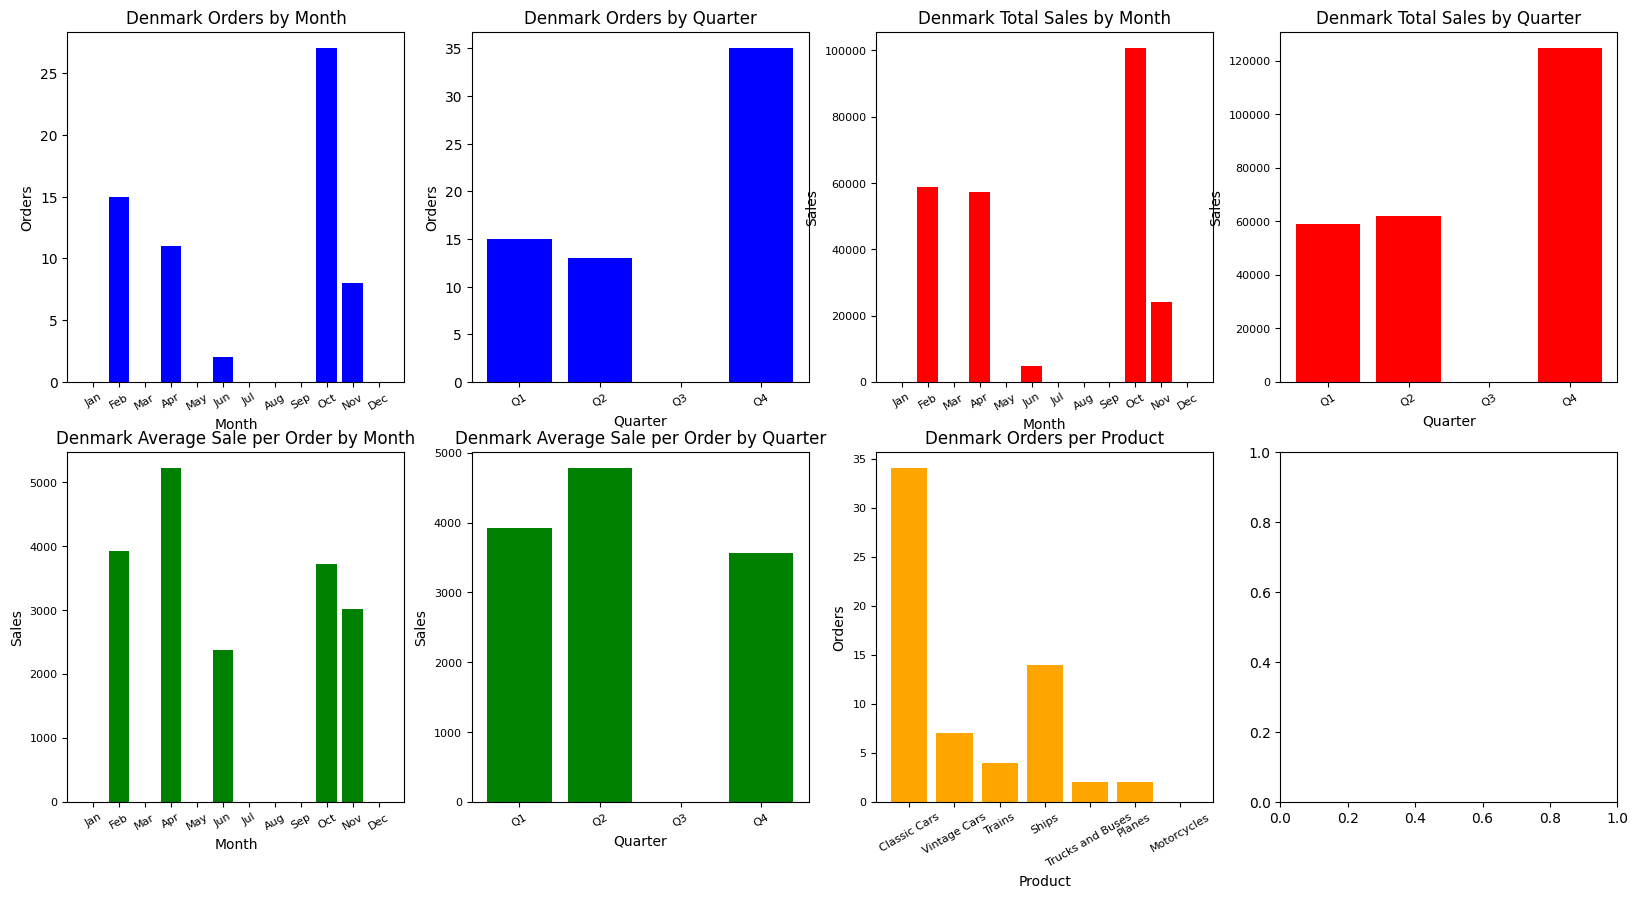

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


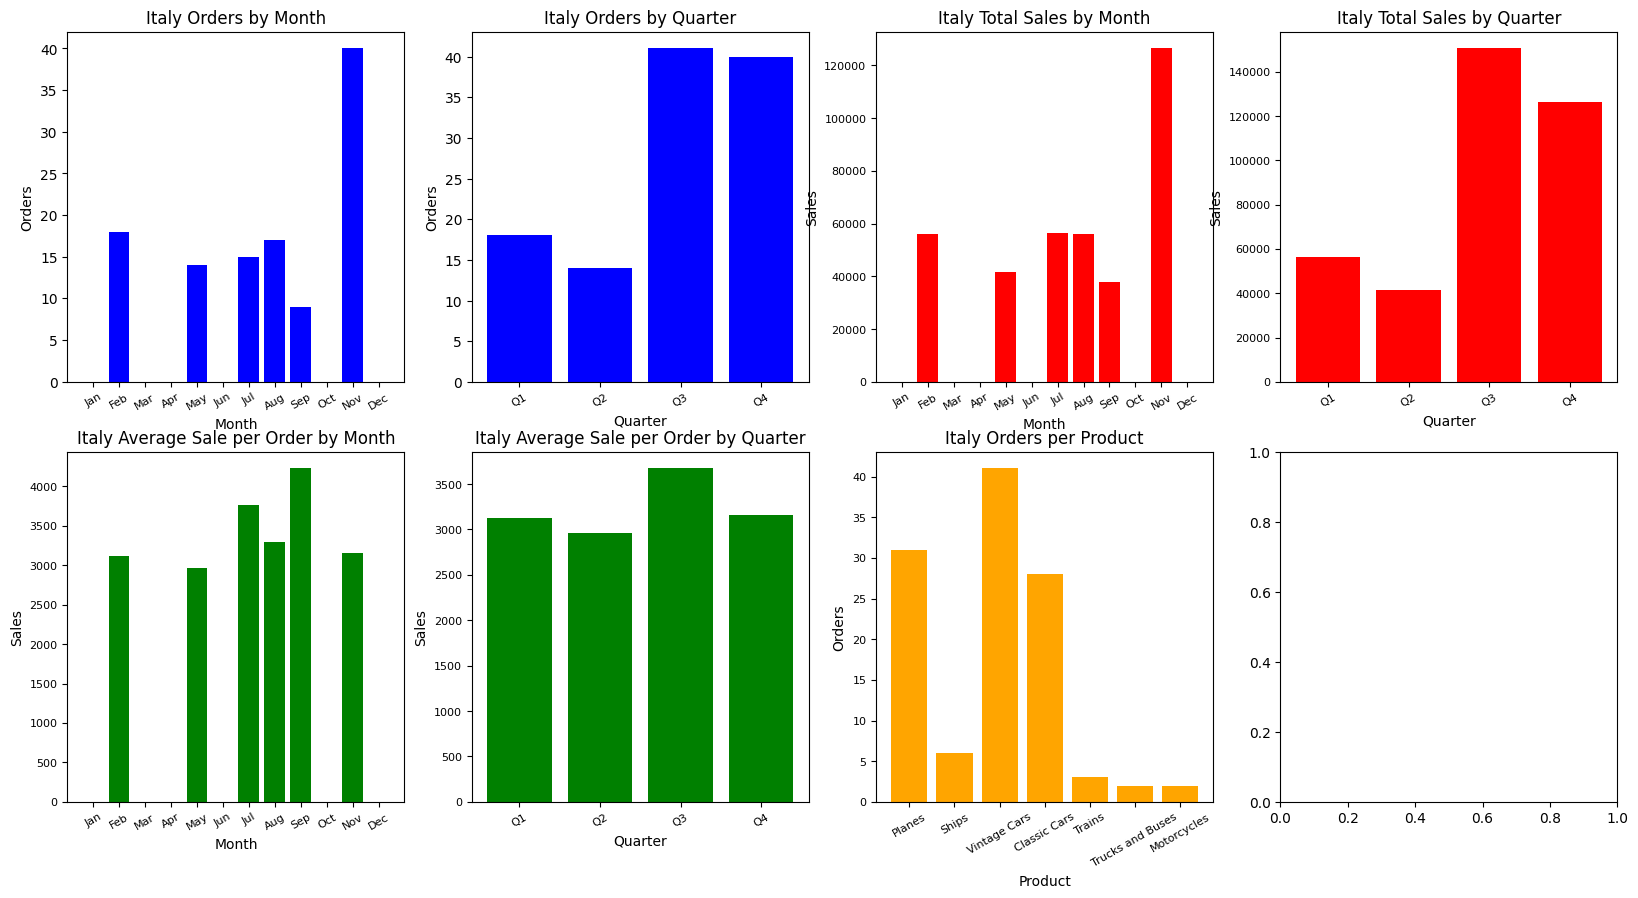

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


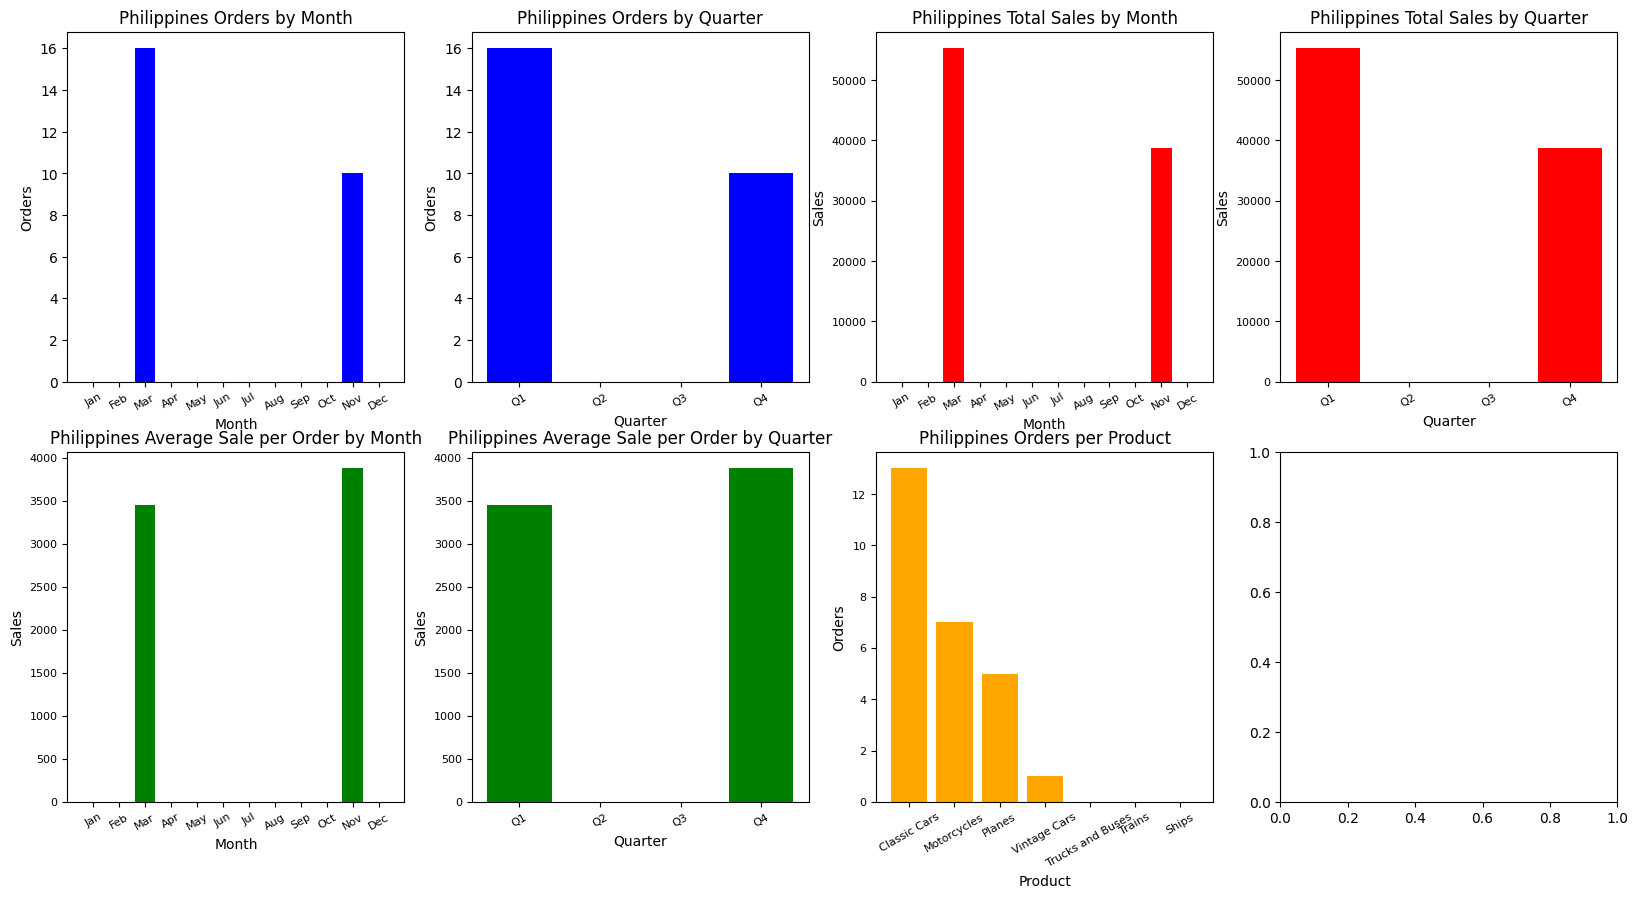

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


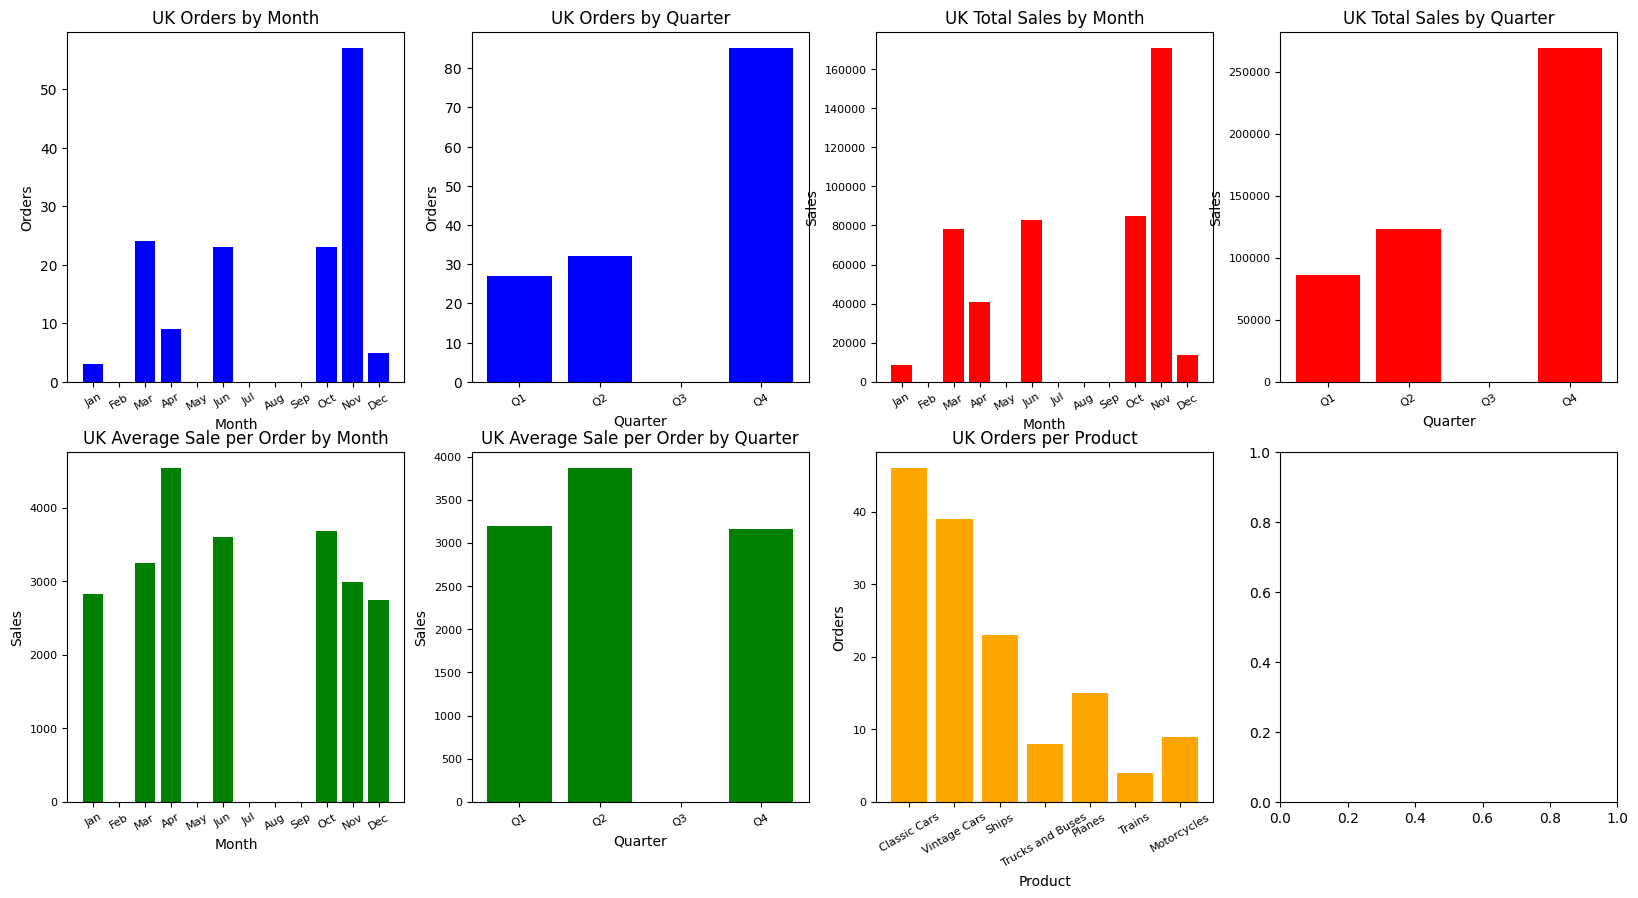

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


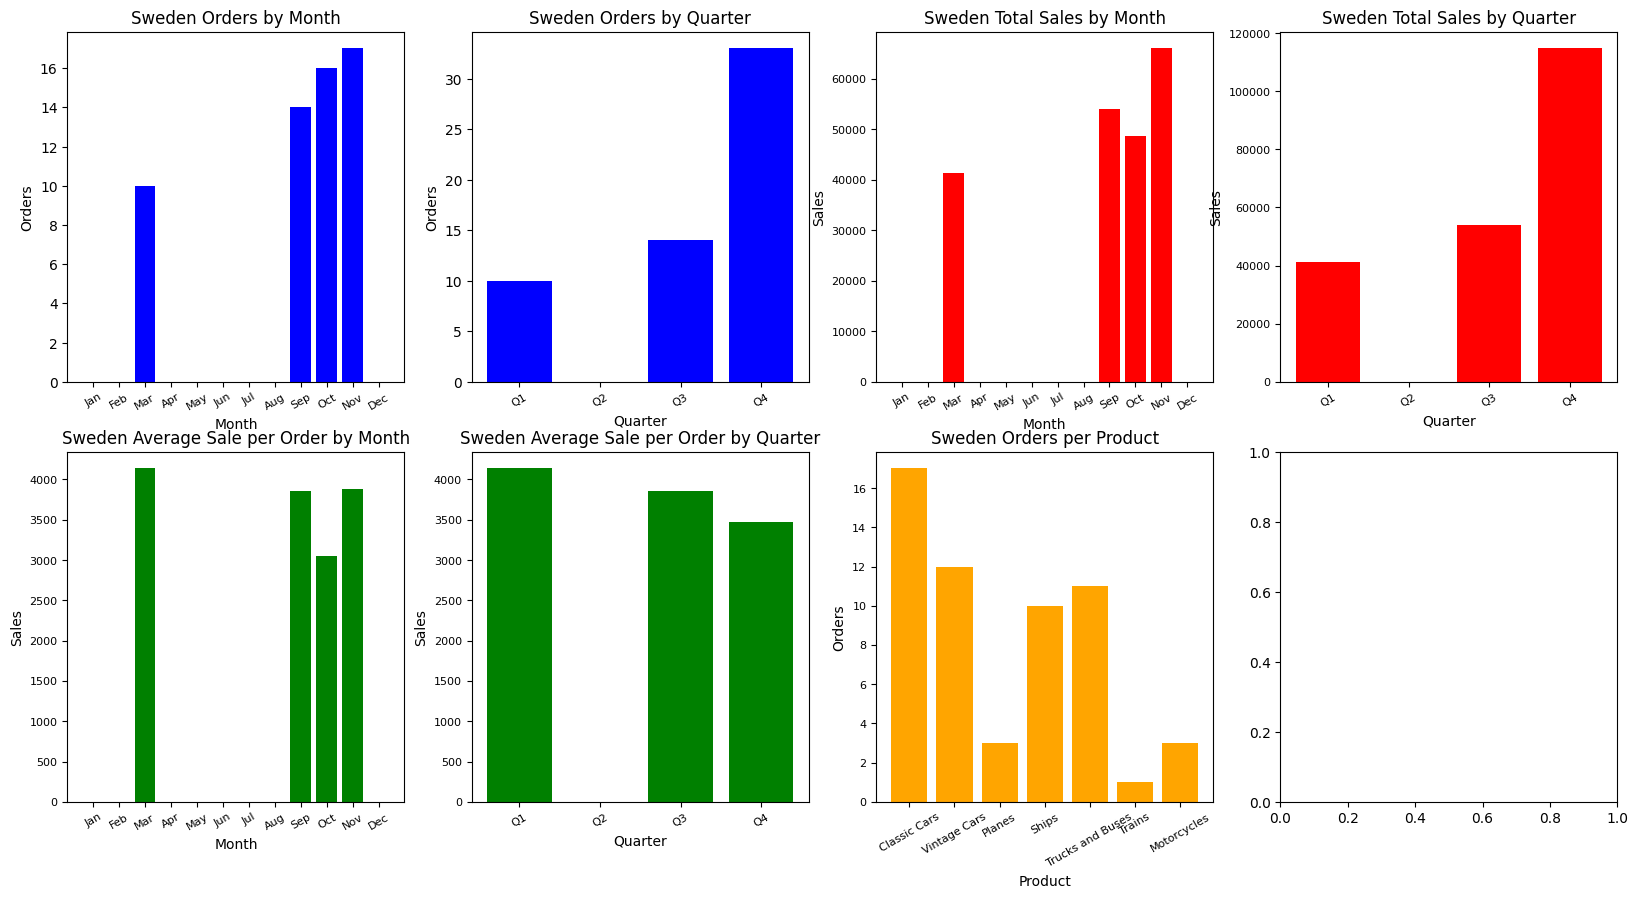

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


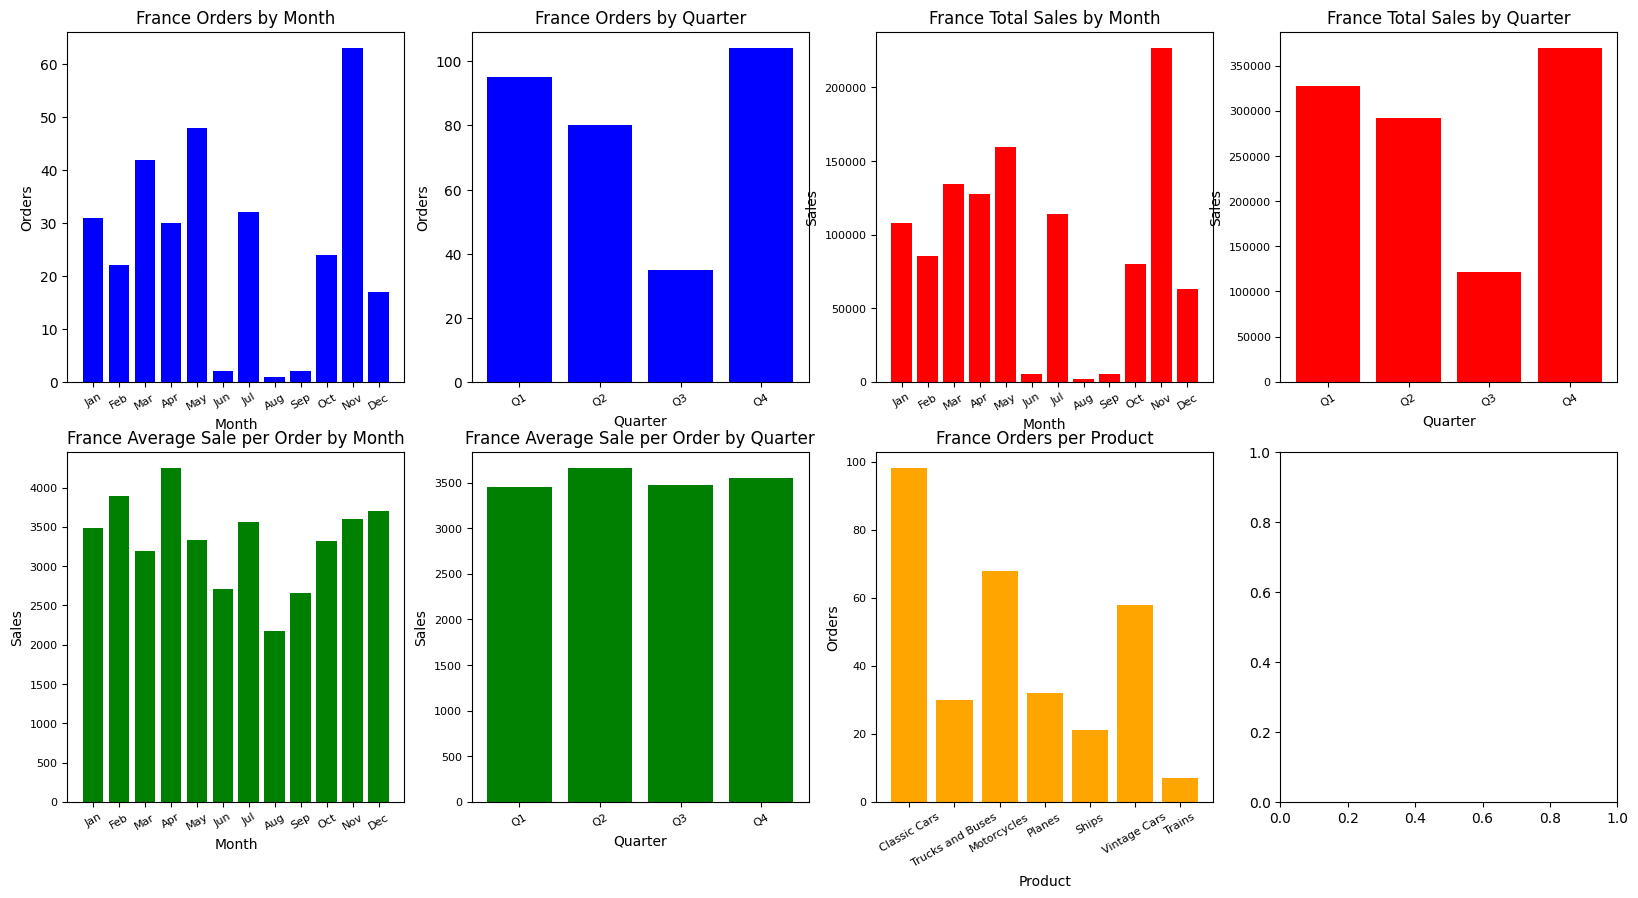

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


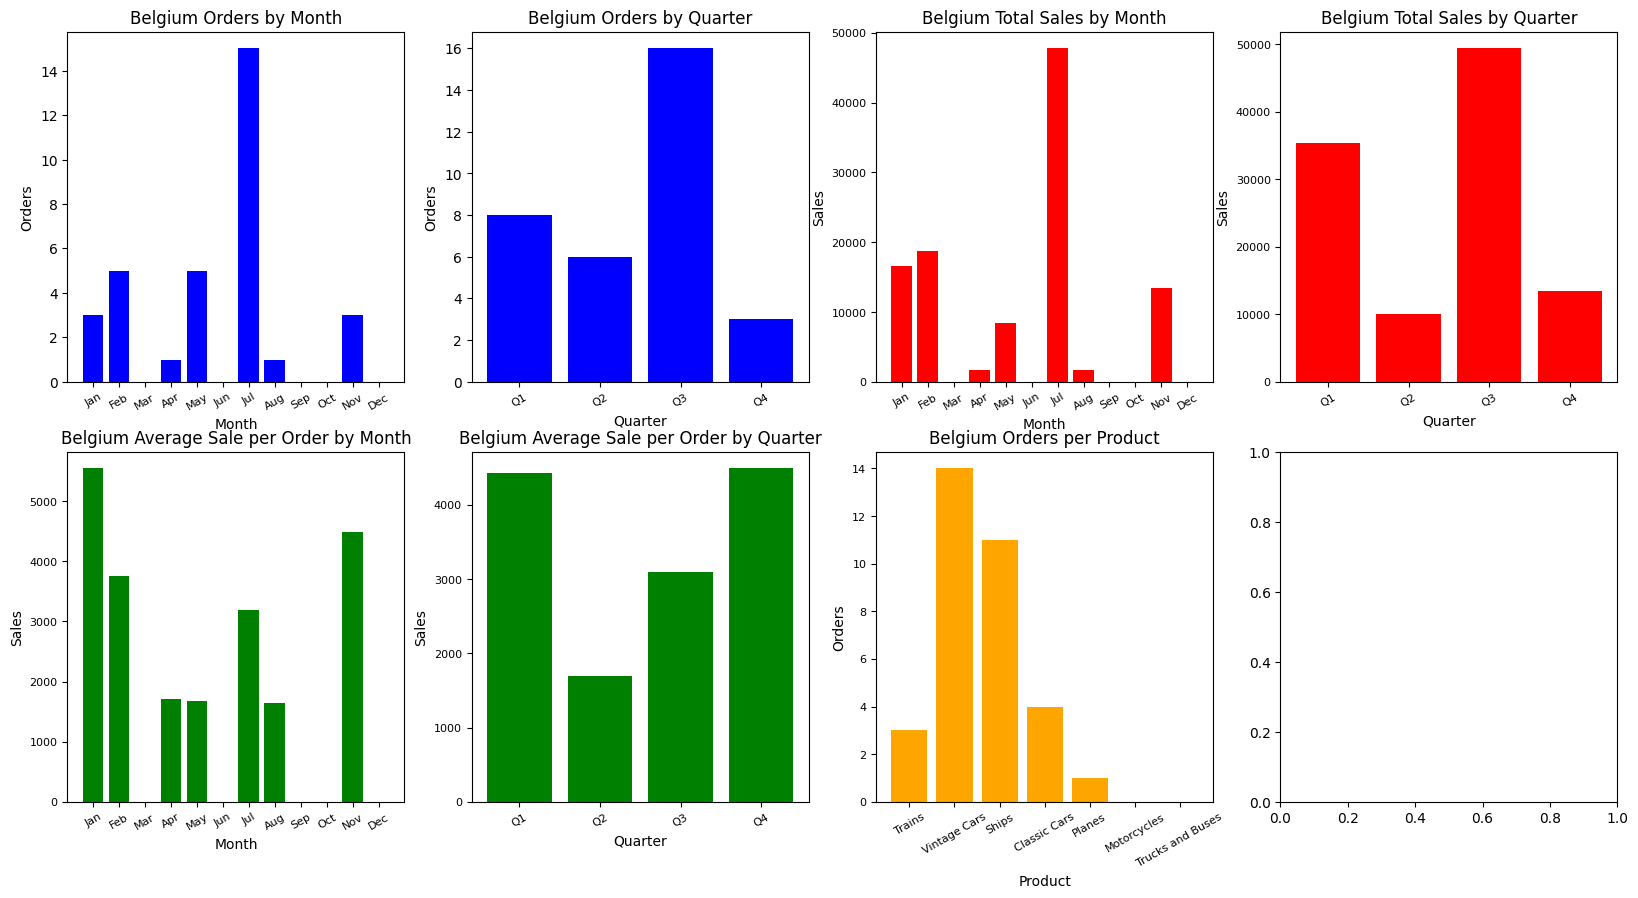

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


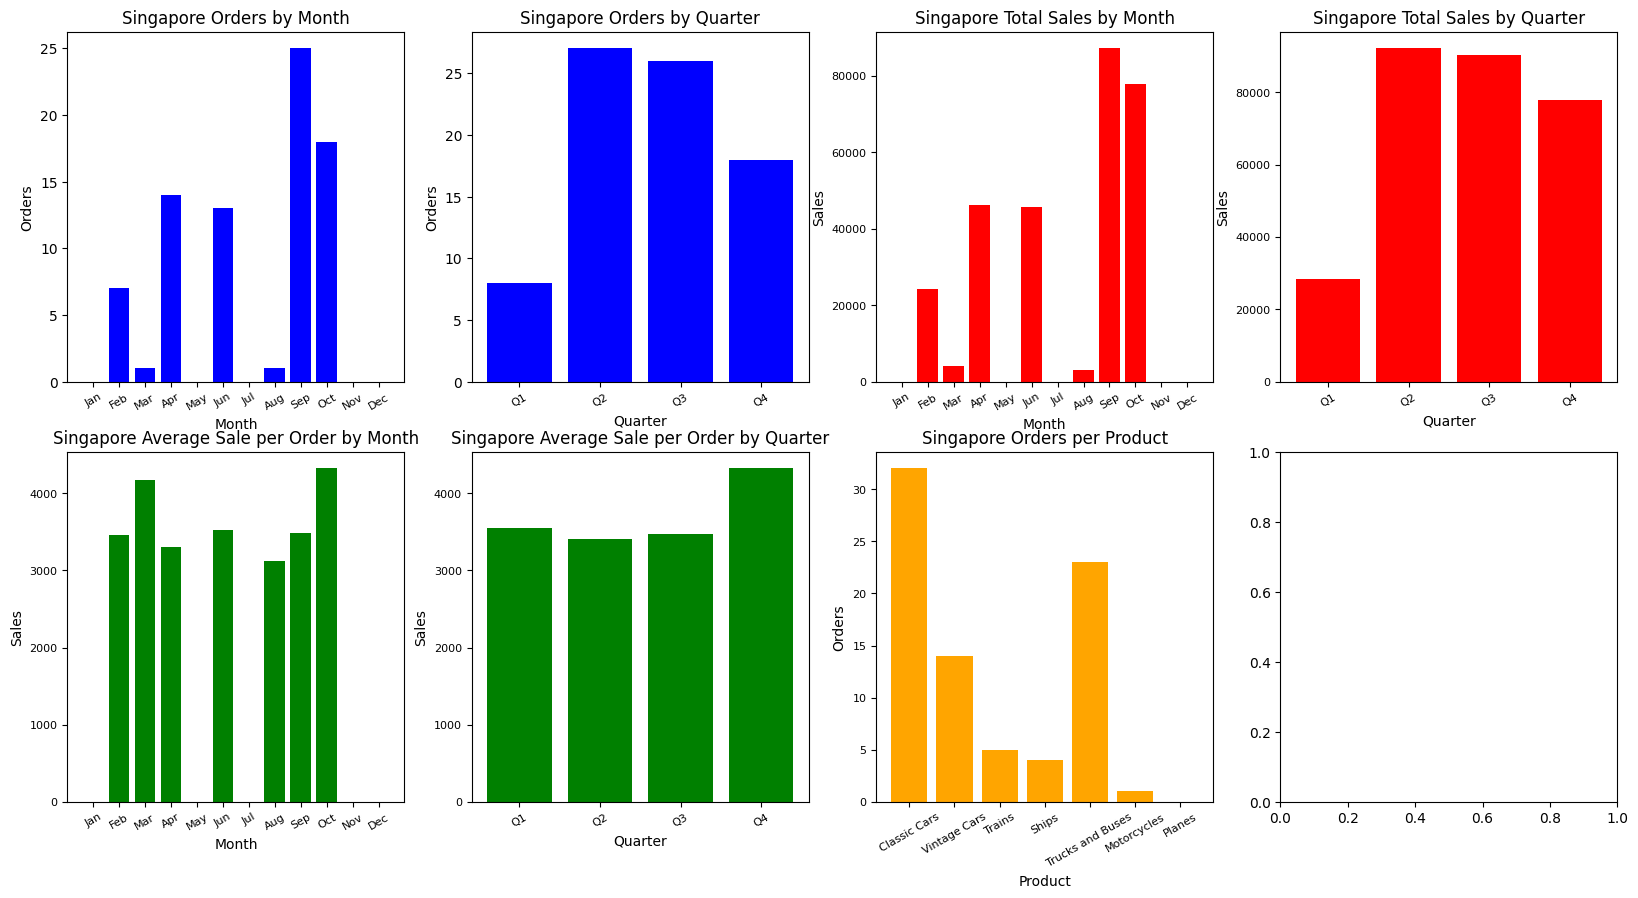

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


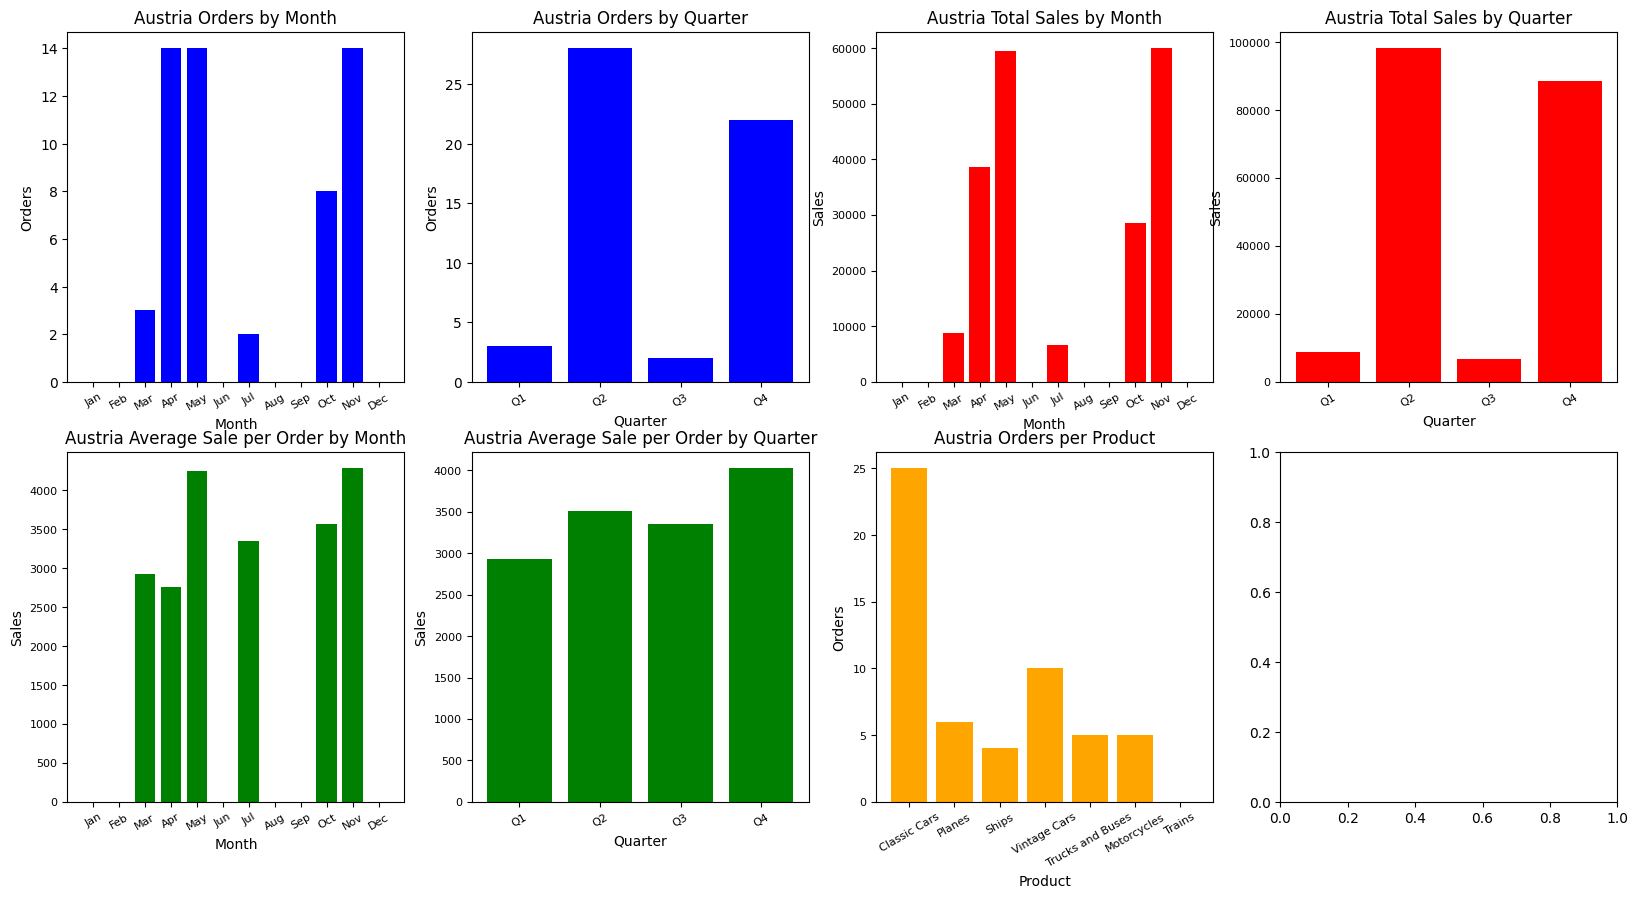

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


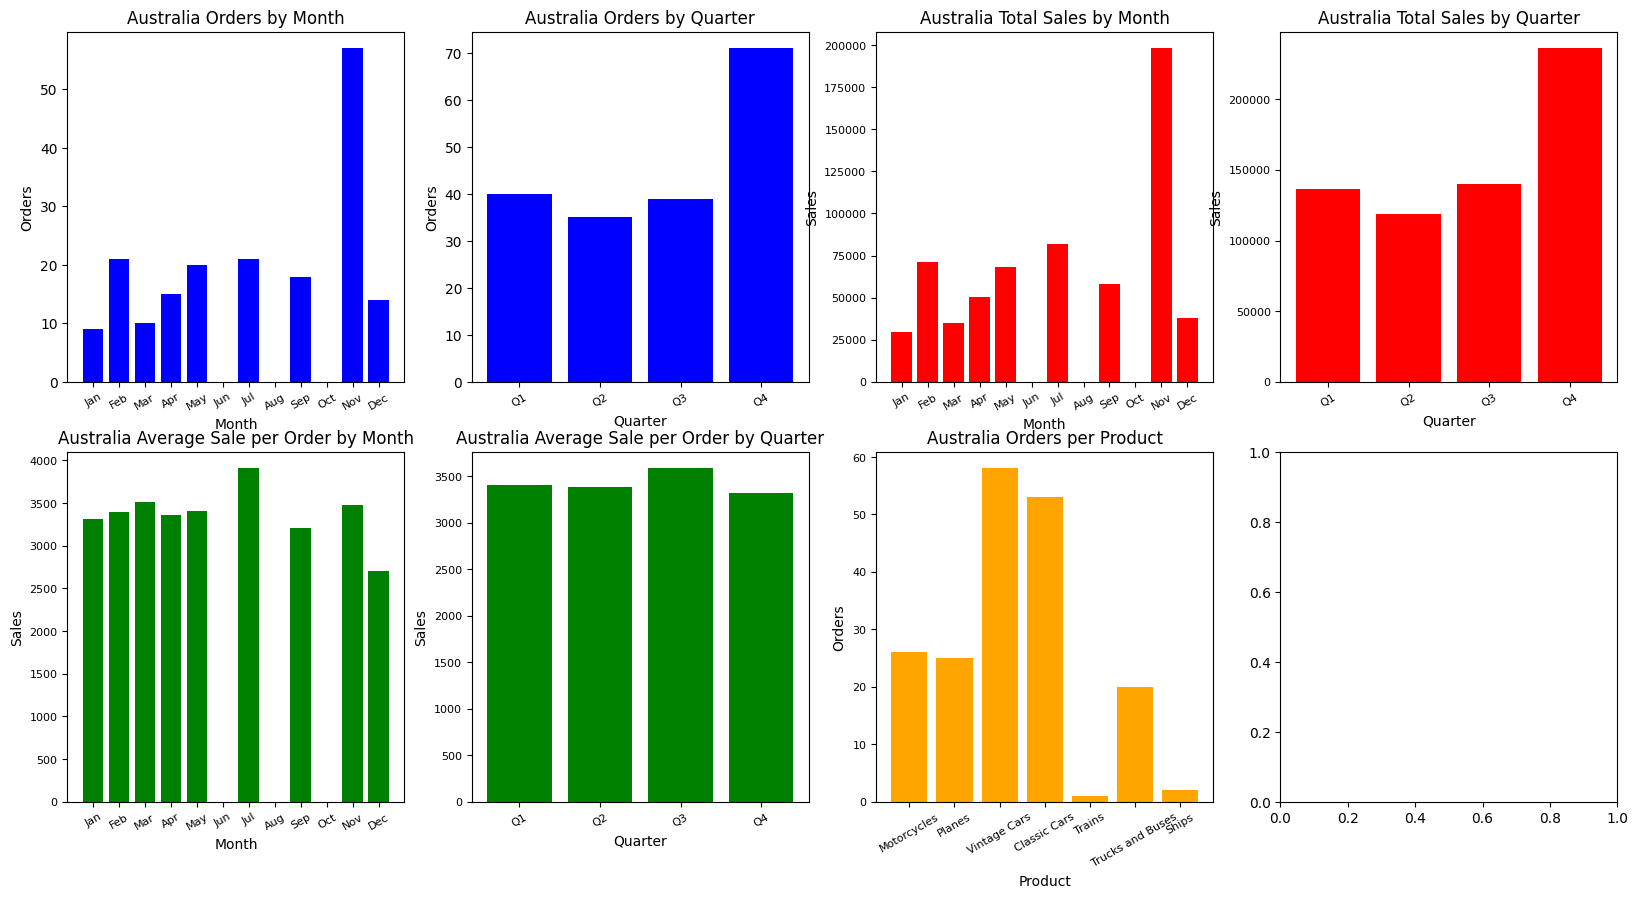

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


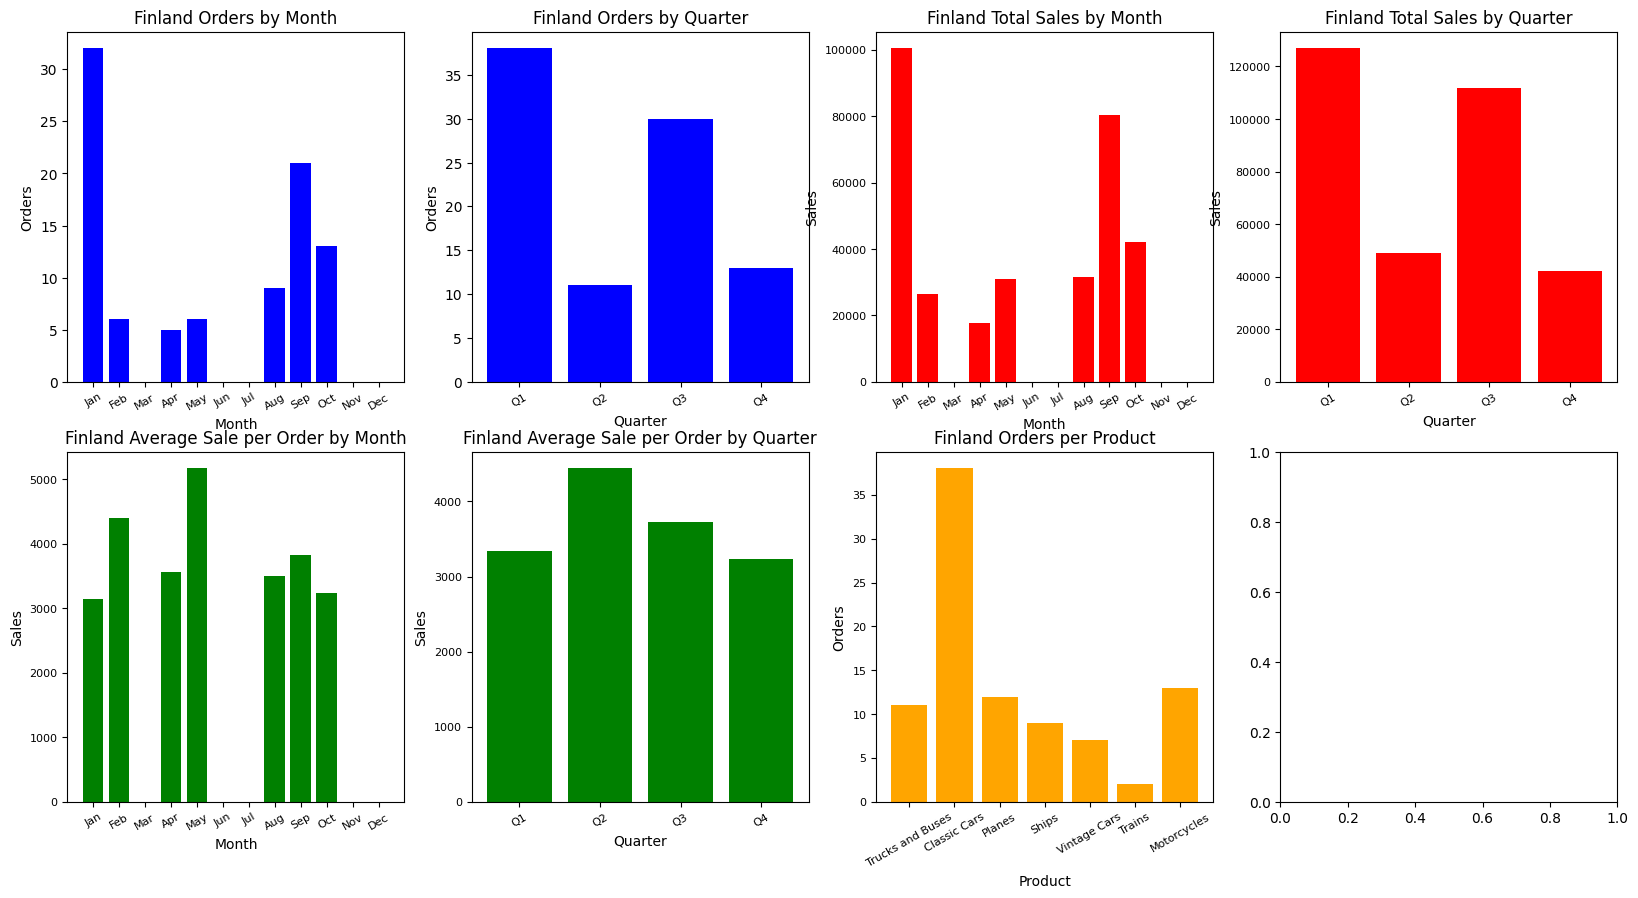

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


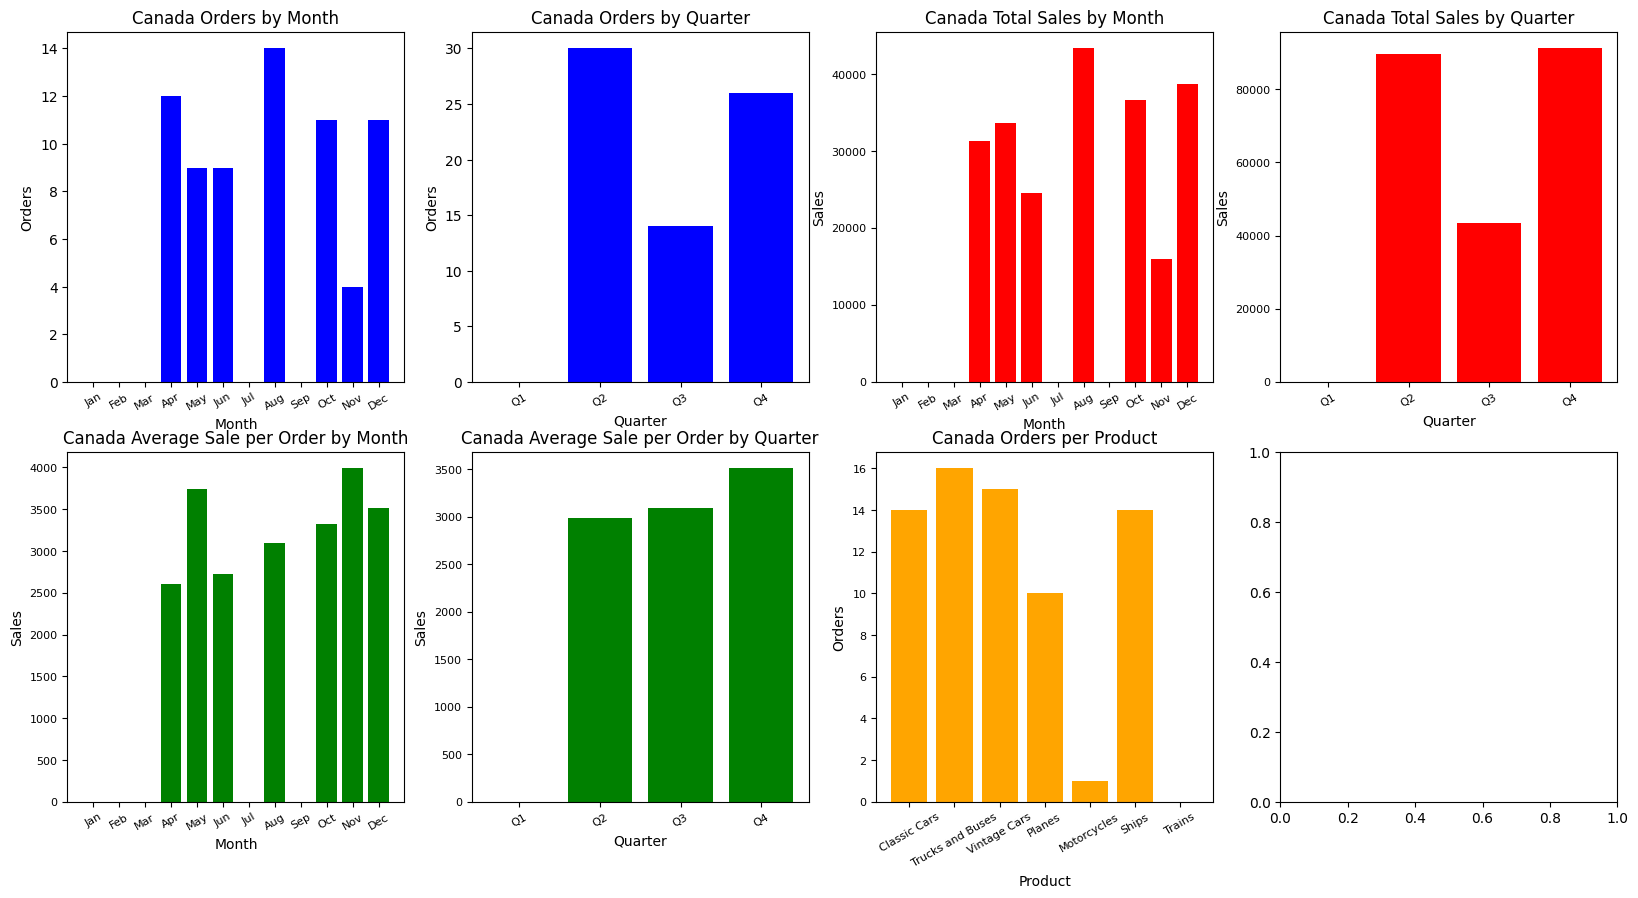

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


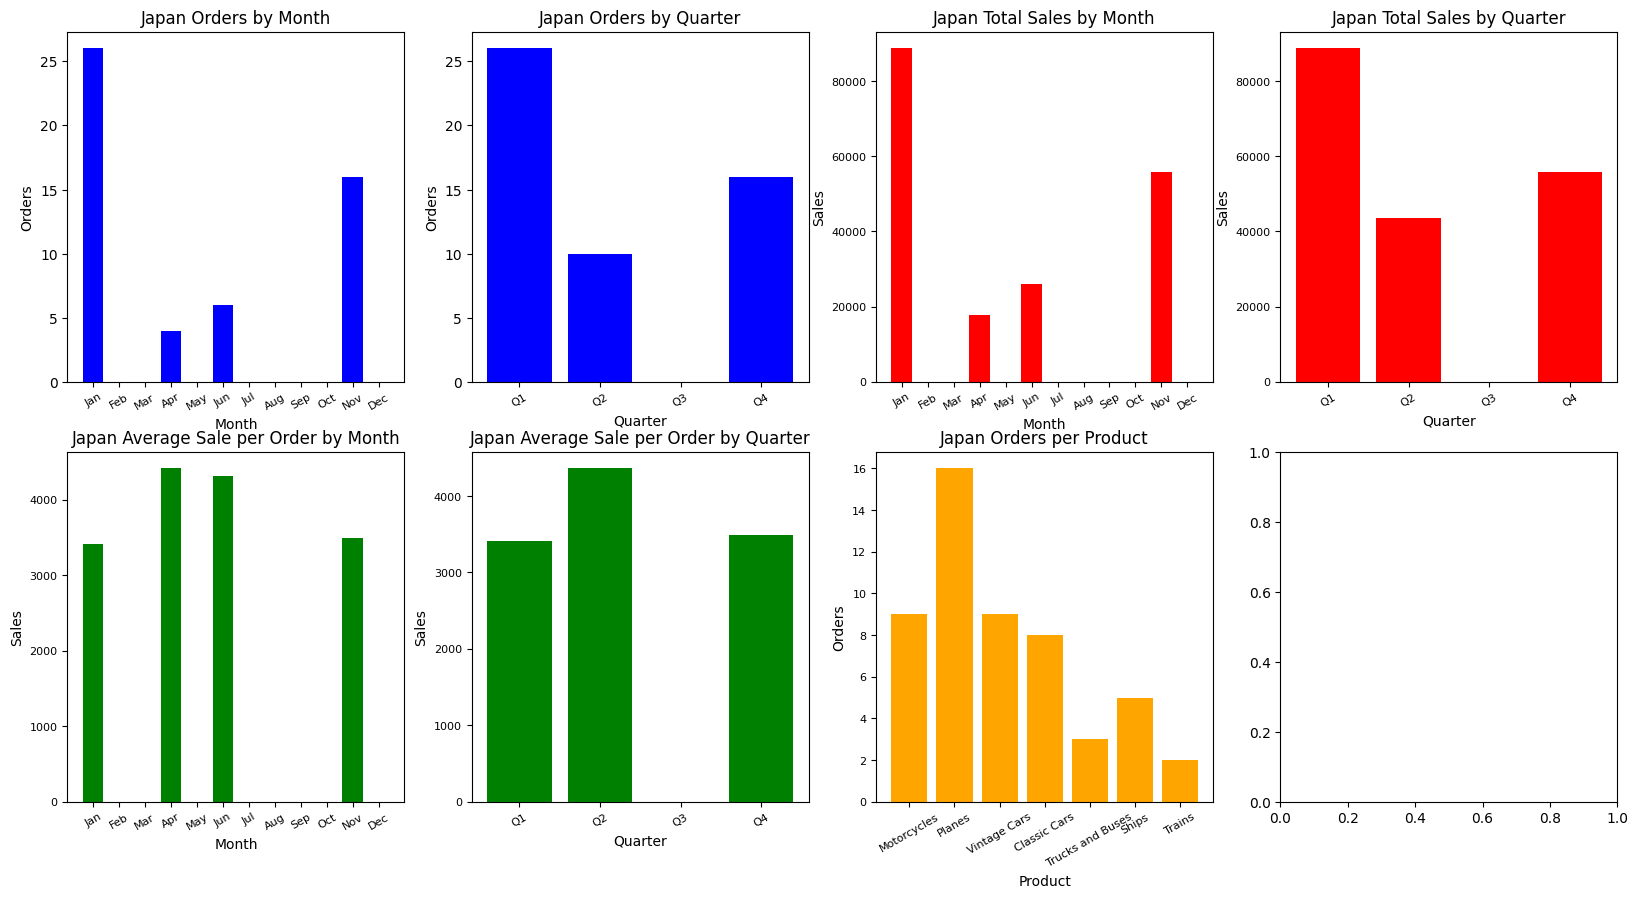

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


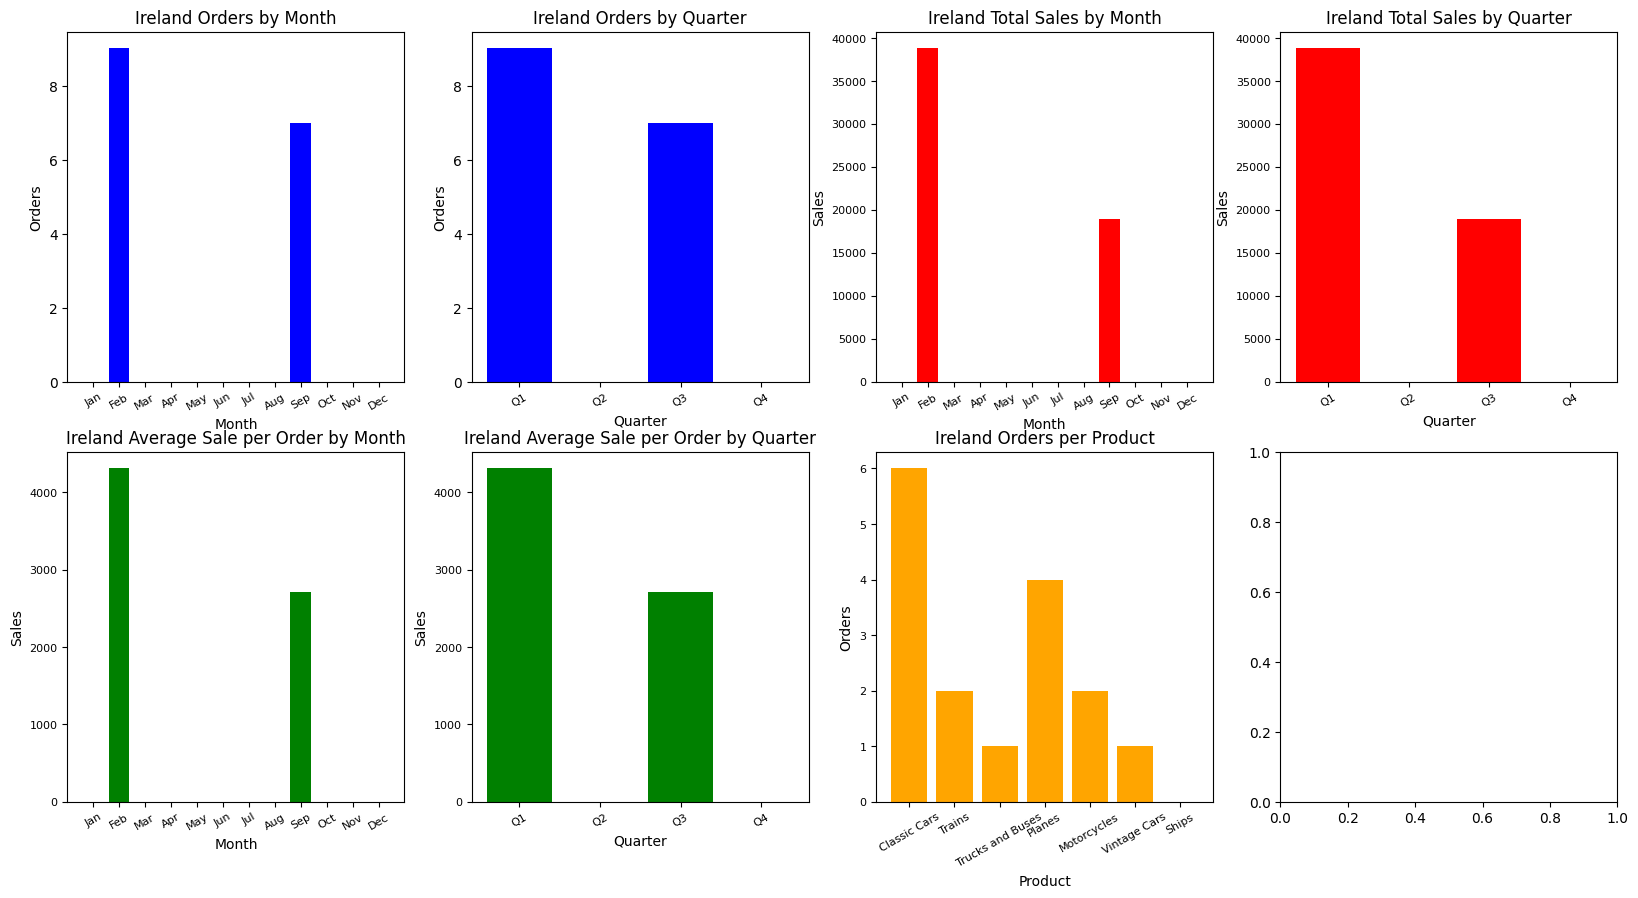

C:\Users\cochr\AppData\Local\Temp\ipykernel_12720\2968085671.py:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_dataframe = dataframe._append(missing_df).sort_index()


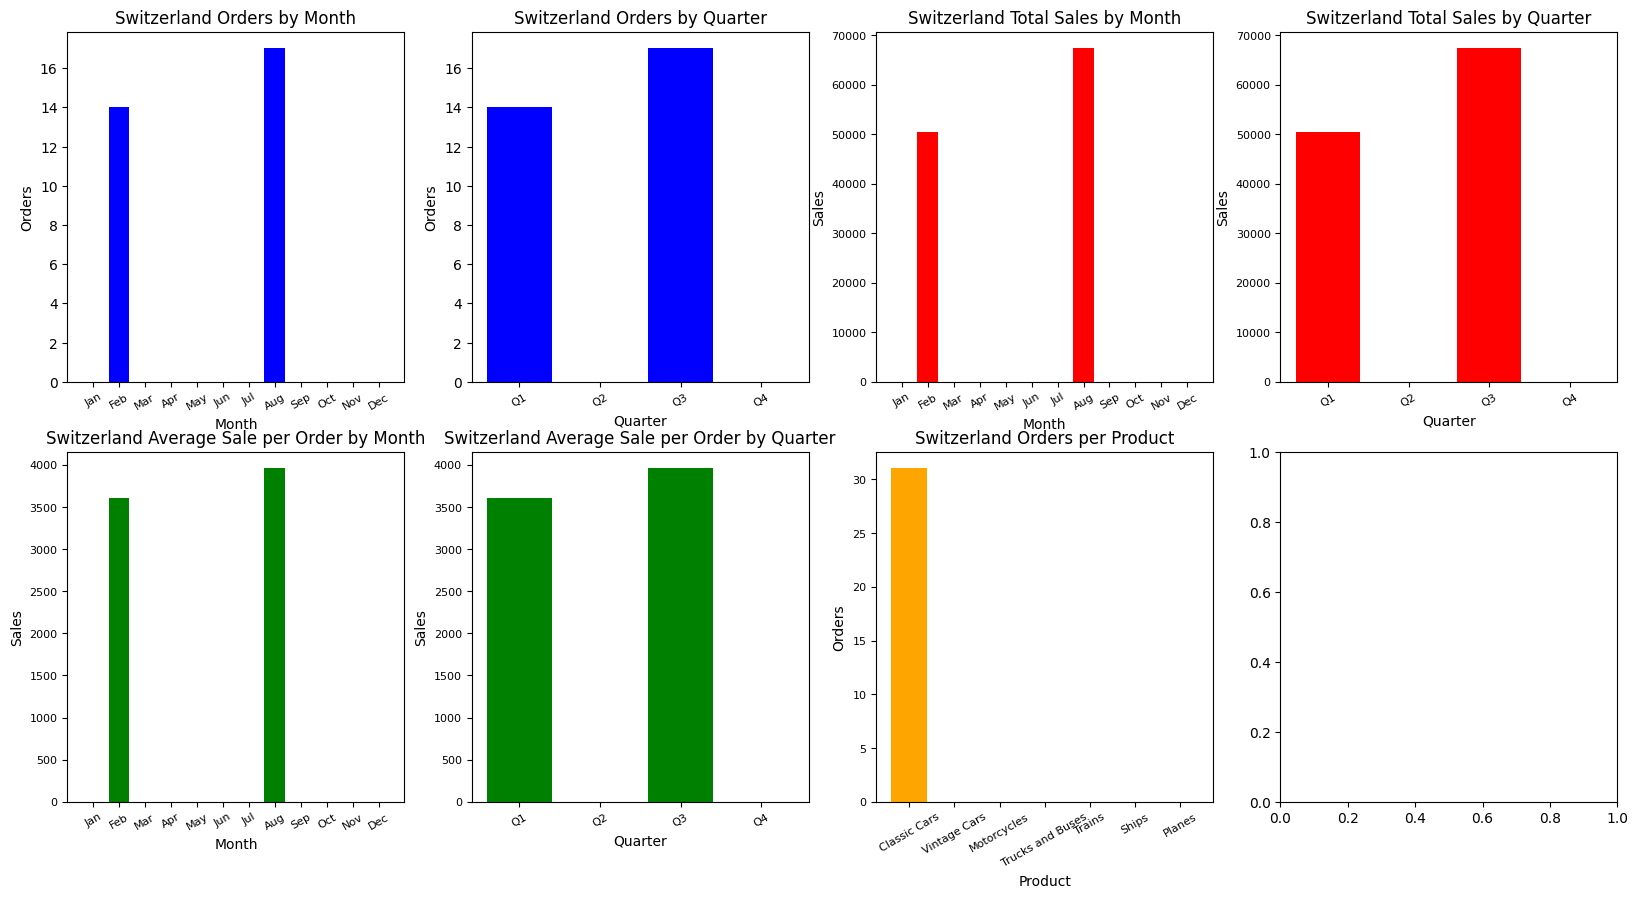

In [32]:
for country in countries:
    image_path = f'C:/Users/cochr/OneDrive/Libertas Data/Projects/Example Projects/Toy Car Sales Project/Chart Images/{country}_charts_1.png'
    data = tcs.TCSpipelineCountry(country = country)
    fill_m_q(data)
    plot_data(data=data,country_name=country,save_image=True,image_path=image_path)
    

Mission Accomplished!!